In [4]:
import ROOT

from ROOT import TFile,TCanvas
from ROOT import TH1,RooDataSet,gROOT,gDirectory

import rootpy
import root_pandas
from root_pandas import read_root, to_root

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Welcome to ROOTaaS 6.06/01


In [5]:
import os

In [6]:
import uproot

In [7]:
from scipy import stats

In [8]:
from multiprocessing import Pool

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

In [10]:
import pandas as pd

In [57]:
import numpy as np
import time

In [103]:
def r(filename):
    print filename
    return pd.read_hdf(filename)

In [12]:
from rootpy.plotting import Hist, HistStack, Legend, Canvas, Graph
from rootpy.plotting.shapes import Line
from rootpy.plotting.style import get_style, set_style
from rootpy.plotting.utils import draw

style = get_style('ATLAS')
style.SetEndErrorSize(3)
set_style(style)

INFO:rootpy.plotting.style] using ROOT style 'ATLAS'


In [13]:
from goofit import PolynomialPdf,Variable,Observable,AddPdf,PdfBase,VoigtianPdf,GaussianPdf,ConvolutionPdf,BWPdf
from goofit import UnbinnedDataSet,BinnedDataSet,FitManager,ExpPdf
from ROOT import TMinuit

In [14]:
from ROOT import RooGaussian,RooPolynomial,RooDataSet,RooDataHist,TH1,TH1F,RooRealVar,RooArgSet,RooArgList,RooExponential
from ROOT import RooAddPdf,kGreen,kRed,kBlue,RooFit,gROOT,TList,RooGenericPdf,RooProdPdf,RooVoigtian,RooChebychev
from ROOT.RooFit import Components,LineColor,LineStyle,Name,Normalization,Layout,Format,Label,Parameters,Range,Title

In [15]:
import goofit

In [139]:
mjpsi = 3.096916
mphi = 1.019455

In [16]:
import numpy as np

In [93]:
data_path = "/lustre/home/adrianodif/Charmonium/2018/"

In [301]:
rates = [25.22, 24.594027597229193, 23.788844687236104, 22.62, 21.665181751123093, 20.263380212143748, 18.508609073851257, 16.192304055238797, 12.830687008362002, 7.050496903297842]

# Private Ys 

In [18]:
TOHDF = False

In [19]:
my_y_path = "/lustre/home/adrianodif/jpsiphi/2018/CMSSW_10_2_1/src/jpsiphi/jpsiphi/test/y_mcs/"

In [20]:
myYs = os.listdir(my_y_path)
myYs = [my_y_path + m for m in myYs if "root" in m]

In [21]:
if TOHDF:
    for ff in myYs:

        print ff
        tree = uproot.open(ff)["rootuple"]["JPsiPhiTree"]
        k = [k for k in tree.keys() if "p4"not in k and "five" not in k]
        a = tree.pandas.df(k)
        s = a.columns.to_series()
        a.columns = s + s.groupby(s).cumcount().astype(str).replace({'0':''})
        a.to_hdf(ff[:-4]+"h5","data",append=False)


In [22]:
myYs = os.listdir(my_y_path)
myYs = [m for m in myYs if "sum.h5" in m]
myYsDf = {}
myYsDfZero = {}
for y in myYs:
    print y
    if "zero" in y:
        myYsDfZero[y[:-3]] = pd.read_hdf(my_y_path + "/" + y)
    else:
        myYsDf[y[:-3]] = pd.read_hdf(my_y_path + "/" + y)

y4140_zero_sum.h5
y4704_zero_sum.h5
y4704_lhcb_sum.h5
y4140_lhcb_sum.h5
y4273_lhcb_sum.h5
y4506_zero_sum.h5
y4273_zero_sum.h5
y4506_lhcb_sum.h5


y4506_lhcb_sum
y4140_lhcb_sum
y4704_lhcb_sum
y4273_lhcb_sum


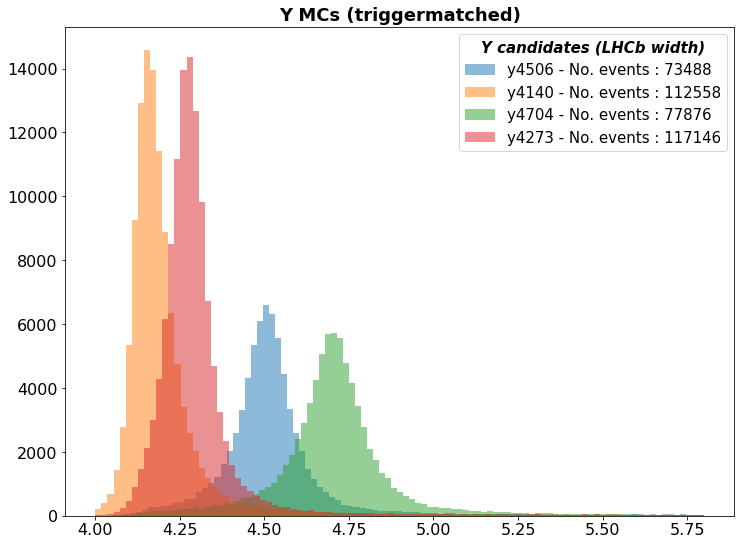

In [46]:
plt.figure(figsize=(12,9))
for k,v in myYsDf.iteritems():
    print k
    thisVal = v[(v["lowKaonMatch"]>0)&(v["highKaonMatch"]>0)]["dimuonditrk_m"]
    plt.hist(thisVal,bins = 100,alpha=0.5,label=str(k[:5]) + " - No. cand : " + str(len(thisVal)));
    legend = plt.legend(title="Y candidates (LHCb width)",fontsize=15)
    plt.setp(legend.get_title(),fontsize=15,fontweight="bold",fontstyle="italic")
    plt.title("Y MCs (triggermatched)",fontsize=18,fontweight="bold")
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)



y4506_lhcb_sum
y4140_lhcb_sum
y4704_lhcb_sum
y4273_lhcb_sum


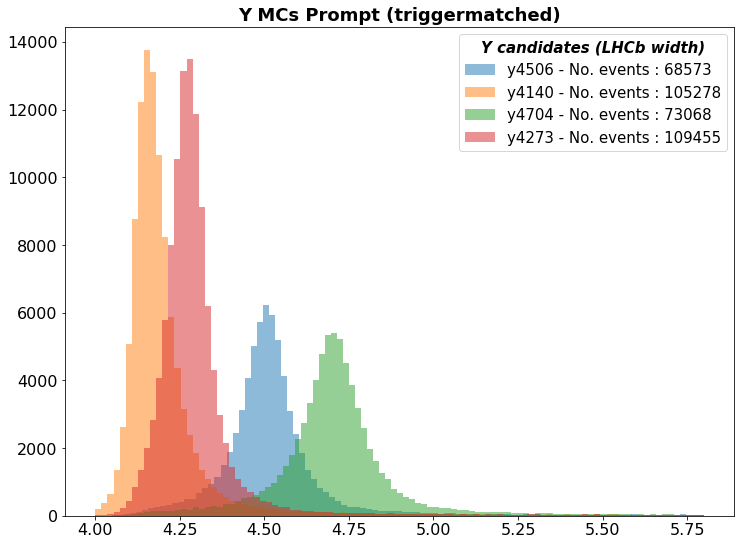

In [47]:
plt.figure(figsize=(12,9))
for k,v in myYsDf.iteritems():
    print k
    prompt = (v["dimuonditrk_ctauPV"]/v["dimuonditrk_ctauErrPV"]<2.0)
    thisVal = v[prompt & (v["lowKaonMatch"]>0)&(v["highKaonMatch"]>0)]["dimuonditrk_m"]
    plt.hist(thisVal,bins = 100,alpha=0.5,label=str(k[:5]) + " - No. cand : " + str(len(thisVal)));
    legend = plt.legend(title="Y candidates (LHCb width)",fontsize=15)
    plt.setp(legend.get_title(),fontsize=15,fontweight="bold",fontstyle="italic")
    plt.title("Y MCs Prompt (triggermatched)",fontsize=18,fontweight="bold")
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

y4506_lhcb_sum
y4140_lhcb_sum
y4704_lhcb_sum
y4273_lhcb_sum


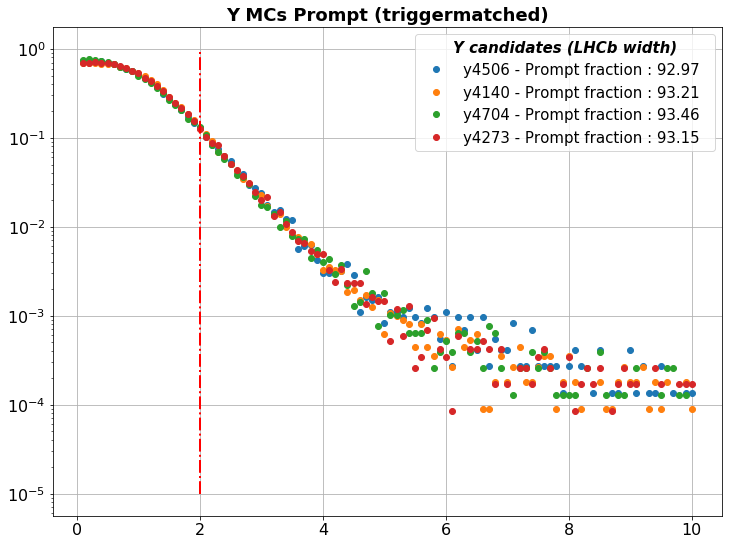

In [184]:
plt.figure(figsize=(12,9))
for k,v in myYsDf.iteritems():
    print k
    thisVal = v[(v["lowKaonMatch"]>0)&(v["highKaonMatch"]>0)]
    ntot = float(len(thisVal))
    npro = float(len(thisVal[thisVal["dimuonditrk_ctauPV"].abs()/thisVal["dimuonditrk_ctauErrPV"].abs()<2.0]))
    rati = npro/ntot * 100.0
    thisVal = thisVal["dimuonditrk_ctauPV"].abs()/thisVal["dimuonditrk_ctauErrPV"].abs()
    #plt.hist(thisVal,bins = 100,alpha=0.5,,log=True,range=(0.0,20.0));
    h = np.histogram(thisVal,bins = 100,range=(0.0,10.0),normed=True)
    plt.plot(h[1][1:],h[0],"o",label=str(k[:5]) + " - Prompt fraction : %.2f  " % rati)#,log=True)
    
    ax = plt.gca()
    ax.semilogy()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    plt.grid()
    
    legend = plt.legend(title="Y candidates (LHCb width)",fontsize=15)
    plt.setp(legend.get_title(),fontsize=15,fontweight="bold",fontstyle="italic")
    plt.title("Y MCs Prompt (triggermatched)",fontsize=18,fontweight="bold")
plt.plot(np.linspace(2.0,2.0,1000),np.linspace(0.00001,1.0,1000),"-.",linewidth=2,c="red")
plt.grid(True)

y4273_zero_sum
y4704_zero_sum
y4140_zero_sum
y4506_zero_sum


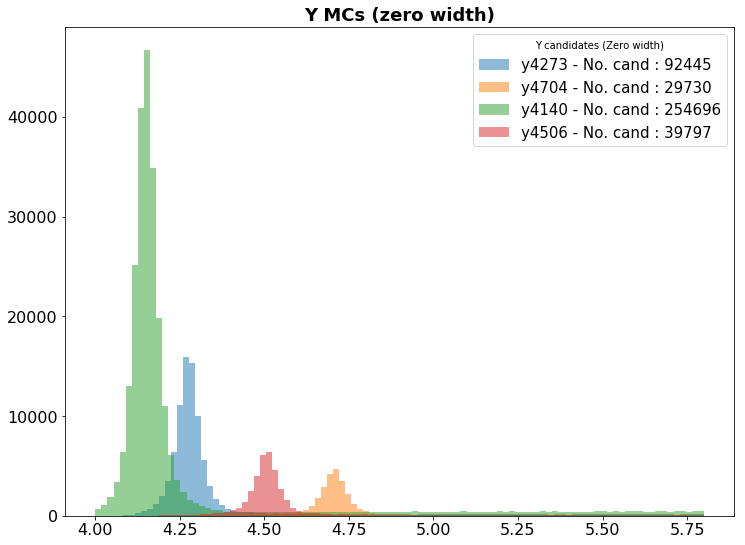

In [292]:
plt.figure(figsize=(12,9))
for k,v in myYsDfZero.iteritems():
    print k
    plt.hist(v["dimuonditrk_m"],bins = 100,alpha=0.5,label=str(k[:5]) + " - No. cand : " + str(len(v["dimuonditrk_m"])));
    legend = plt.legend(title="Y candidates (Zero width)",fontsize=15)
    plt.title("Y MCs (zero width)",fontsize=18,fontweight="bold")
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

# Y  v0

In [195]:
yMasses = {}
yLimits = {}

for k in myYsDf.iterkeys():
    yMasses[k] = float(k[1:5])*0.001
    yLimits[k] = [max(float(k[1:5])*0.001-0.3,4.0),min(float(k[1:5])*0.001+0.3,5.5)]
    #yLimits[k] = [4.0,5.5]
    #print(yLimits)

In [275]:
nevY = {}
dats = {}
fits = {}
yEff = {}

MnSeedGenerator: for initial parameters FCN = -125088.4333357
MnSeedGenerator: Initial state:   - FCN =  -125088.4333357 Edm =      15845.3 NCalls =     23
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -125088.4333357 Edm =      15845.3 NCalls =     23
VariableMetric: Iteration #   0 - FCN =  -125088.4333357 Edm =      15845.3 NCalls =     23
VariableMetric: Iteration #   1 - FCN =   -129227.930059 Edm =      6811.93 NCalls =     39
VariableMetric: Iteration #   2 - FCN =  -131344.2337215 Edm =       377.07 NCalls =     53
VariableMetric: Iteration #   3 - FCN =  -132136.5776031 Edm =      156.171 NCalls =     66
VariableMetric: Iteration #   4 - FCN =  -132390.4185157 Edm =      38.0031 NCalls =     79
VariableMetric: Iteration #   5 - FCN =  -132431.5006704 Edm =      7.93616 NCalls =     90
VariableMetric: Iteration #   6 - FCN =  -132441.2427769 Edm =      4.79241 NCalls =    102
VariableMetric: Iteration #   7 - FCN =  -132446.82184

VariableMetric: Iteration #   7 - FCN =  -284120.4105285 Edm =      5.86122 NCalls =    131
VariableMetric: Iteration #   8 - FCN =  -284128.6748332 Edm =     0.101969 NCalls =    143
VariableMetric: Iteration #   9 - FCN =   -284128.904223 Edm =    0.0631031 NCalls =    155
VariableMetric: Iteration #  10 - FCN =  -284129.2683201 Edm =     0.189289 NCalls =    168
VariableMetric: Iteration #  11 - FCN =  -284131.0613777 Edm =     0.978324 NCalls =    181
VariableMetric: Iteration #  12 - FCN =  -284132.3245046 Edm =    0.0256279 NCalls =    193
VariableMetric: Iteration #  13 - FCN =  -284132.3529563 Edm =  0.000452239 NCalls =    205
VariableMetric: Iteration #  14 - FCN =  -284132.3534121 Edm =  8.18791e-07 NCalls =    216
VariableMetric: After Hessian   - FCN =  -284132.3534121 Edm =  6.84628e-07 NCalls =    255
VariableMetric: Iteration #  15 - FCN =  -284132.3534121 Edm =  6.84628e-07 NCalls =    255

Minuit did successfully converge.
# of function calls: 255
minimum function Val

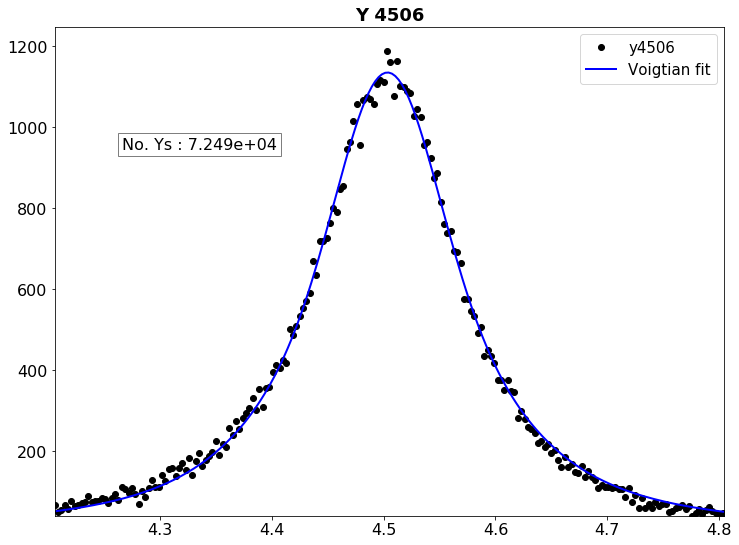

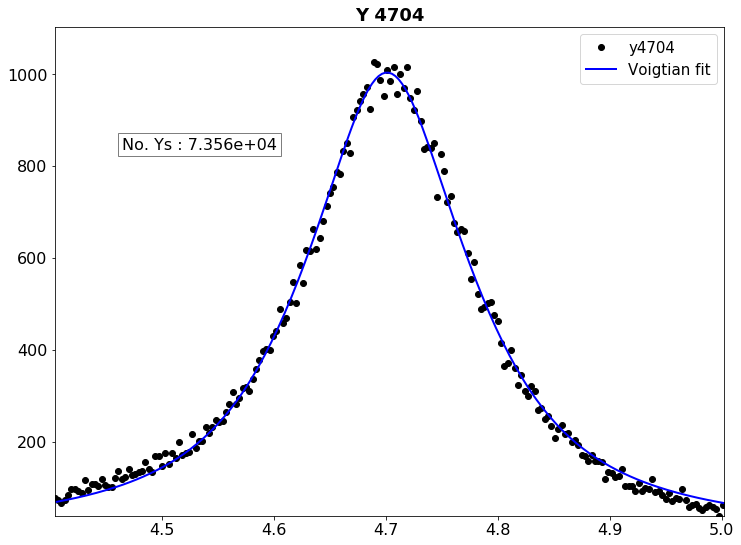

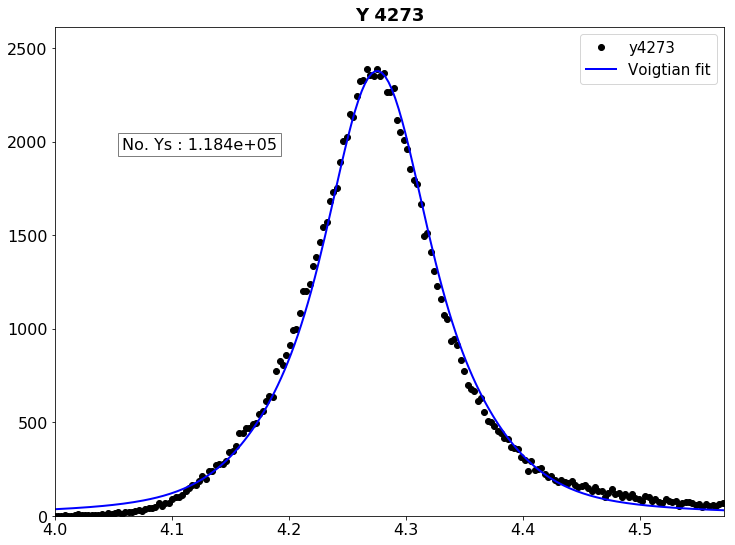

In [278]:
##Ys no cut
y_t0 = {}
for k,d in myYsDf.iteritems():
    
    nevY[k] = []  
    dats[k] = []
    fits[k] = []
    
    if "4140" in k:
        continue
    nbins = 50.0
    ngraph = 200.0
    a = d[(d["highKaonMatch"]>0.0) & (d["highKaonMatch"]>0.0)].copy()
    #a = a[a["dimuonditrk_ctauPV"]/a["dimuonditrk_ctauErrPV"]<1.5]
    canvas = {}
    signal = {}
    entry = {}
    
    cut = 0.0
    
    b_min = yLimits[k][0]
    b_max = yLimits[k][1]
    b_mass = yMasses[k]


    #dat = a[a["dimuonditrk_m"]>mjpsi + mphi]["dimuonditrk_m"].values - a[a["dimuonditrk_m"]>mjpsi + mphi]["dimuon_m"].values + mjpsi
    dat = a["dimuonditrk_m"].values
    m = Observable("m",b_min,b_max)
    
    m.numbins = int(nbins)
    mean = Variable("mean",b_mass,b_min,b_max)
    sigma_1 = Variable("sigma_1",0.01,0.001,0.5)
    sig_1 = GaussianPdf("gauss_1",m,mean,sigma_1)

    sigma_2 = Variable("sigma_2",0.1,0.001,0.5)
    sig_2 = GaussianPdf("gauss_2",m,mean,sigma_2)
    gFrac = Variable("gFrac",0.05,0.0,1.0)
    
    sigma_3 = Variable("sigma_3",0.1,0.01,0.5)
    width = Variable("width",0.1,0.001,0.5)
    sig_3 = VoigtianPdf("voigt",m,mean,sigma_3,width)
    sFrac = Variable("sFrac",0.05,0.0,1.0)

    res = AddPdf("res",gFrac,sig_1,sig_3)
    sig = AddPdf("sig",sFrac,res,sig_3)
    #sigma_3 = Variable("sigma_3",0.1,0.001,0.5)
    #sig_3 = VoigtianPdf("gauss_3",m,mean,sigma_3,width)
    #gFrac_2 = Variable("gFrac_2",0.05,0.0,1.0)
    
    alpha = Variable("alpha",-0.5,-5.0,10.0)
    
    #sig = AddPdf("sig",gFrac_2,sig_0,sig_3)
    
    data = UnbinnedDataSet(m)

    bkg = ExpPdf("bkg",m,alpha)
    sFrac = Variable("sFrac",0.2,0.0,0.5)
    #nSig = Variable("nSig",1e3,10,1e5)
    #nBkg = Variable("nBkg",1e3,10,1e5)

    tot = res #AddPdf("add",[sFrac],[sig,bkg])
    data.from_matrix([dat], filter=True)

    tot.fitTo(data);

    dat = data.to_matrix()
    # Make grid and evaluate on it
    #m.numbins = 100
    #grid_data = tot.makeGrid()
    m.numbins = int(ngraph)
    grid = tot.makeGrid()
    tot.setData(grid)
    main, gauss, exp = tot.getCompProbsAtDataPoints()
    xvals = grid.to_matrix().flatten()
    nev = len(dat[0])
    mainSum = np.sum(main)
    main = np.multiply(main,nev)/np.sum(main)
    gauss = np.multiply(gauss,nev)/np.sum(gauss)
    exp = np.multiply(exp,nev)/np.sum(exp)
    hh = np.histogram(dat[0],bins=int(ngraph))#,range=(mean.value-0.5,mean.value+0.5))
    
    fig = plt.figure(figsize=(12,9))
    #plt.hist(dat[0],bins=int(ngraph))
    plt.plot(hh[1][:-1],hh[0],"o",c="black",label=str(k[:5]))
    plt.plot([mean.value],[max(main)*1.1])
    plt.plot(xvals,main,linewidth=2,c="blue",label="Voigtian fit")
    ax = plt.gca()
    ax.margins(x=0,y=0,tight=False)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    plt.title("Y " + str(k[1:5]) ,fontsize=18,fontweight="bold")
    plt.legend(fontsize=15)
    plt.text(0.1, .75, "No. Ys : %.3e" %nev,fontsize=16,bbox=dict(facecolor='white', alpha=0.5),transform=ax.transAxes)
    #plt.plot(xvals,main)
    #plt.plot(xvals,gauss)
    #fig.patch.set_visible(False)
    
    nevY[k].append(nev)  
    dats[k].append(hh)
    fits[k].append(main)

In [279]:
##Ys 
newYNev = {}
ngraph = 200
for k,d in myYsDf.iteritems(): 
    newYNev[k] = []
    for vCut in range(9,0,-1):
        if "4140" in k:
            continue

        a = d[(d["highKaonMatch"]>0.0) & (d["highKaonMatch"]>0.0)].copy()

        a = a[(a["dimuonditrk_vChi2"]/a["dimuonditrk_nDof"]<vCut)]
    
        canvas = {}
        signal = {}
        entry = {}

        cut = 0.0

        b_min = yLimits[k][0]
        b_max = yLimits[k][1]
        b_mass = yMasses[k]

        dat = a["dimuonditrk_m"].values #[a["dimuonditrk_m"]>mjpsi + mphi]["dimuonditrk_m"].values - a[a["dimuonditrk_m"]>mjpsi + mphi]["dimuon_m"].values + mjpsi

        m = Observable("m",b_min,b_max)

        mean = Variable("mean",b_mass,b_min,b_max)
        sigma_1 = Variable("sigma_1",0.01,0.001,0.5)
        sig_1 = GaussianPdf("gauss_1",m,mean,sigma_1)

        sigma_2 = Variable("sigma_2",0.1,0.001,0.5)
        width = Variable("width",0.1,0.001,0.5)
        #sig_2 = GaussianPdf("gauss_2",m,mean,sigma_2)
        sig_2 = VoigtianPdf("gauss_2",m,mean,sigma_2,width)
        gFrac = Variable("gFrac",0.05,0.0,1.0)

        sig = AddPdf("sig",gFrac,sig_1,sig_2)

        #sigma_3 = Variable("sigma_3",0.1,0.001,0.5)
        #sig_3 = VoigtianPdf("gauss_3",m,mean,sigma_3,width)
        #gFrac_2 = Variable("gFrac_2",0.05,0.0,1.0)

        alpha = Variable("alpha",-0.5,-5.0,10.0)

        #sig = AddPdf("sig",gFrac_2,sig_0,sig_3)

        data = UnbinnedDataSet(m)

        bkg = ExpPdf("bkg",m,alpha)
        sFrac = Variable("sFrac",0.2,0.0,0.5)
        #nSig = Variable("nSig",1e3,10,1e5)
        #nBkg = Variable("nBkg",1e3,10,1e5)

        tot = sig #AddPdf("add",[sFrac],[sig,bkg])
        data.from_matrix([dat], filter=True)

        tot.fitTo(data);

        dat = data.to_matrix()

        plt.figure(figsize=(12,9))

        # Make grid and evaluate on it
        #m.numbins = 100
        #grid_data = tot.makeGrid()
        m.numbins = int(ngraph)
        grid = tot.makeGrid()
        tot.setData(grid)
        main, gauss, exp = tot.getCompProbsAtDataPoints()
        xvals = grid.to_matrix().flatten()
        nev = len(dat[0])
        mainSum = np.sum(main)
        main = np.multiply(main,nev)/np.sum(main)
        hh = np.histogram(dat[0],bins=int(ngraph))#,range=(mean.value-0.5,mean.value+0.5))
        
        nevY[k].append(nev)  
        dats[k].append(hh)
        fits[k].append(main)
        

MnSeedGenerator: for initial parameters FCN = -122532.5471468
MnSeedGenerator: Initial state:   - FCN =  -122532.5471468 Edm =      18255.1 NCalls =     23
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -122532.5471468 Edm =      18255.1 NCalls =     23
VariableMetric: Iteration #   0 - FCN =  -122532.5471468 Edm =      18255.1 NCalls =     23
VariableMetric: Iteration #   1 - FCN =  -125547.2702455 Edm =      12449.3 NCalls =     35
VariableMetric: Iteration #   2 - FCN =  -128862.4778467 Edm =      976.971 NCalls =     49
VariableMetric: Iteration #   3 - FCN =  -129939.2984922 Edm =      556.068 NCalls =     65
VariableMetric: Iteration #   4 - FCN =  -130277.9186803 Edm =      37.7301 NCalls =     76
VariableMetric: Iteration #   5 - FCN =  -130308.8843958 Edm =      9.94274 NCalls =     88
VariableMetric: Iteration #   6 - FCN =   -130340.463884 Edm =      1.63713 NCalls =    102
VariableMetric: Iteration #   7 - FCN =   -130342.4109

VariableMetric: Iteration #   1 - FCN =  -124979.3452724 Edm =        12509 NCalls =     35
VariableMetric: Iteration #   2 - FCN =  -128299.5522019 Edm =      1008.41 NCalls =     49
VariableMetric: Iteration #   3 - FCN =  -129368.5269748 Edm =      567.641 NCalls =     65
VariableMetric: Iteration #   4 - FCN =  -129720.4837474 Edm =      36.5045 NCalls =     77
VariableMetric: Iteration #   5 - FCN =   -129752.578166 Edm =      11.6867 NCalls =     88
VariableMetric: Iteration #   6 - FCN =  -129783.1719878 Edm =      3.62752 NCalls =    102
VariableMetric: Iteration #   7 - FCN =  -129787.4920374 Edm =     0.710515 NCalls =    114
VariableMetric: Iteration #   8 - FCN =  -129788.3570158 Edm =     0.120053 NCalls =    126
VariableMetric: Iteration #   9 - FCN =  -129788.5379072 Edm =   0.00909679 NCalls =    138
VariableMetric: Iteration #  10 - FCN =   -129788.598326 Edm =    0.0380634 NCalls =    151
VariableMetric: Iteration #  11 - FCN =  -129789.0832198 Edm =     0.136528 NCal

VariableMetric: Iteration #   1 - FCN =  -123734.9211129 Edm =        12476 NCalls =     35
VariableMetric: Iteration #   2 - FCN =  -127040.9163268 Edm =      1020.52 NCalls =     49
VariableMetric: Iteration #   3 - FCN =  -128104.9652561 Edm =      574.154 NCalls =     65
VariableMetric: Iteration #   4 - FCN =    -128461.49851 Edm =       35.464 NCalls =     77
VariableMetric: Iteration #   5 - FCN =   -128493.312923 Edm =      11.7679 NCalls =     88
VariableMetric: Iteration #   6 - FCN =  -128524.6605901 Edm =      3.67863 NCalls =    102
VariableMetric: Iteration #   7 - FCN =   -128528.834968 Edm =     0.721414 NCalls =    114
VariableMetric: Iteration #   8 - FCN =  -128529.7336497 Edm =     0.120472 NCalls =    126
VariableMetric: Iteration #   9 - FCN =  -128529.9202645 Edm =   0.00882307 NCalls =    138
VariableMetric: Iteration #  10 - FCN =  -128529.9740819 Edm =    0.0310817 NCalls =    151
VariableMetric: Iteration #  11 - FCN =  -128530.2552026 Edm =    0.0733715 NCal

VariableMetric: Iteration #   0 - FCN =  -117314.7463496 Edm =      17880.3 NCalls =     23
VariableMetric: Iteration #   1 - FCN =   -120191.009946 Edm =      12379.4 NCalls =     35
VariableMetric: Iteration #   2 - FCN =   -123444.380452 Edm =       1066.1 NCalls =     49
VariableMetric: Iteration #   3 - FCN =  -124488.2421286 Edm =      575.869 NCalls =     65
VariableMetric: Iteration #   4 - FCN =  -124852.7575481 Edm =      33.4413 NCalls =     77
VariableMetric: Iteration #   5 - FCN =   -124885.551236 Edm =      11.4893 NCalls =     88
VariableMetric: Iteration #   6 - FCN =  -124919.7173744 Edm =      3.14299 NCalls =    102
VariableMetric: Iteration #   7 - FCN =    -124922.47951 Edm =     0.387388 NCalls =    114
VariableMetric: Iteration #   8 - FCN =  -124923.0868717 Edm =    0.0615376 NCalls =    126
VariableMetric: Iteration #   9 - FCN =  -124923.1901018 Edm =   0.00789192 NCalls =    138
VariableMetric: Iteration #  10 - FCN =   -124923.274355 Edm =    0.0309784 NCal

VariableMetric: Iteration #   3 - FCN =  -86453.69458719 Edm =      377.973 NCalls =     64
VariableMetric: Iteration #   4 - FCN =   -86766.6538053 Edm =      30.8276 NCalls =     77
VariableMetric: Iteration #   5 - FCN =  -86807.45638562 Edm =      17.7322 NCalls =     89
VariableMetric: Iteration #   6 - FCN =  -86840.14773589 Edm =      1.36803 NCalls =    102
VariableMetric: Iteration #   7 - FCN =  -86842.60824672 Edm =     0.425086 NCalls =    114
VariableMetric: Iteration #   8 - FCN =  -86843.04728334 Edm =     0.126934 NCalls =    126
VariableMetric: Iteration #   9 - FCN =  -86843.28382064 Edm =    0.0430352 NCalls =    138
VariableMetric: Iteration #  10 - FCN =  -86843.42126154 Edm =    0.0125071 NCalls =    150
VariableMetric: Iteration #  11 - FCN =  -86843.45860395 Edm =    0.0174751 NCalls =    162
VariableMetric: Iteration #  12 - FCN =  -86844.42299528 Edm =     0.737745 NCalls =    180
VariableMetric: Iteration #  13 - FCN =  -86845.48939776 Edm =     0.921991 NCal

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00462337
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -119463.1056147 Edm =  0.000763033 NCalls =    205
VariableMetric: Iteration #  12 - FCN =  -119463.1056147 Edm =  0.000763033 NCalls =    205


INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.00712056
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.000763033
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001



Minuit did successfully converge.
# of function calls: 205
minimum function Value: -119463.1056147
minimum edm: 0.0007630328512853
minimum internal state vector: LAVector parameters:
    -0.9994896753449
    -0.0083970410434
     -1.021893438274
    -0.4211618784811
    -0.9681885563489

minimum internal covariance matrix: LASymMatrix parameters:
    0.043098458 -5.5946047e-06    0.010947875   0.0037031934    0.010280427
 -5.5946047e-06  1.8152537e-06 -1.3718406e-06  3.5402736e-07 -2.4463397e-06
    0.010947875 -1.3718406e-06   0.0029993089    0.001028022   0.0024710701
   0.0037031934  3.5402736e-07    0.001028022  0.00048620907  0.00069993351
    0.010280427 -2.4463397e-06   0.0024710701  0.00069993351   0.0026971125


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||    0.07940242717034 ||0.03954638248089
   1   ||      mean || limited ||      4.701480917291 ||0.0002857982386657
   2   ||   sigma_1 || limited ||    0.03765218496969 ||

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00475888
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -119226.9121716 Edm =  1.11067e-05 NCalls =    205
VariableMetric: Iteration #  12 - FCN =  -119226.9121716 Edm =  1.11067e-05 NCalls =    205

Minuit did successfully converge.
# of function calls: 205
minimum function Value: -119226.9121716
minimum edm: 1.110667155817e-05
minimum internal state vector: LAVector parameters:
    -0.9984407170968
  -0.008328894487841
     -1.021435819291
    -0.4207931923329
    -0.9686976619089

minimum internal covariance matrix: LASymMatrix parameters:
    0.043188115 -5.4913515e-06    0.010895589   0.0037412305    0.010308466
 -5.4913515e-06  1.8176414e-06 -1.3314086e-06  3.6683409e-07 -2.4357345e-06
    0.010895589 -1.3314086e-06   0.0029676439   0.0010317112   0.0024589638
   0.0037412305  3.6683409e-07   0.0010317112  0.00049252816  0.00070851228
    0.010308466 -2.4357345e-06   0.0024589638  0.00070851228   0.0027076504


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac 

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.0047951
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -118960.4818238 Edm =  0.000208477 NCalls =    205
VariableMetric: Iteration #  12 - FCN =  -118960.4818238 Edm =  0.000208477 NCalls =    205


INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.0070906
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.000208477
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001



Minuit did successfully converge.
# of function calls: 205
minimum function Value: -118960.4818238
minimum edm: 0.000208476834469
minimum internal state vector: LAVector parameters:
     -1.000083433573
   -0.00829899513814
     -1.021287743546
    -0.4219275255571
     -0.968569136357

minimum internal covariance matrix: LASymMatrix parameters:
    0.043611928 -5.4453604e-06    0.011005782   0.0037682771     0.01033787
 -5.4453604e-06  1.8213351e-06 -1.3150207e-06  3.6358264e-07 -2.4048584e-06
    0.011005782 -1.3150207e-06   0.0029997407   0.0010395367   0.0024660948
   0.0037682771  3.6358264e-07   0.0010395367  0.00049390789  0.00070911629
     0.01033787 -2.4048584e-06   0.0024660948  0.00070911629   0.0026969607


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||    0.07924196938468 ||0.03974280505725
   1   ||      mean || limited ||      4.701510330037 ||0.0002862768066674
   2   ||   sigma_1 || limited ||    0.03773107154549 ||0

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00489425
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -118517.6063205 Edm =   0.00371311 NCalls =    205
VariableMetric: Iteration #  12 - FCN =  -118517.6063205 Edm =   0.00371311 NCalls =    205


INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.0070642
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.00371311
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001
INFO:ROOT.Minuit2] VariableMetricBuilder: INVALID function minimum - edm is above tolerance, : edm = 0.00371311
INFO:ROOT.Minuit2] VariableMetricBuilder: Required tolerance  is 10 x edmval  : edmval = 0.0001




# of function calls: 205
minimum function Value: -118517.6063205
minimum edm: 0.003713111435967
minimum internal state vector: LAVector parameters:
     -1.002779203092
    -0.0082579375406
     -1.022142056025
    -0.4243632028344
    -0.9677819943886

minimum internal covariance matrix: LASymMatrix parameters:
    0.044088108  -5.695827e-06    0.011354394   0.0038093257    0.010283959
  -5.695827e-06  1.8266032e-06 -1.4613632e-06  3.1936259e-07 -2.4010563e-06
    0.011354394 -1.4613632e-06   0.0031506762    0.001069802   0.0025061395
   0.0038093257  3.1936259e-07    0.001069802  0.00049661269  0.00070650205
    0.010283959 -2.4010563e-06   0.0025061395  0.00070650205   0.0026412128


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||    0.07851532851602 ||0.0397896612537
   1   ||      mean || limited ||      4.701522646895 ||0.0002866906236436
   2   ||   sigma_1 || limited ||     0.0376198272292 ||0.005163338591144
   3   ||   sigma

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00460068
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -117873.3378611 Edm =  0.000562463 NCalls =    190
VariableMetric: Iteration #  11 - FCN =  -117873.3378611 Edm =  0.000562463 NCalls =    190


INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.0070258
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.000562463
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001



Minuit did successfully converge.
# of function calls: 190
minimum function Value: -117873.3378611
minimum edm: 0.0005624629591092
minimum internal state vector: LAVector parameters:
     -1.001889147881
  -0.008328171136718
     -1.023697884479
    -0.4254571751613
    -0.9663476064624

minimum internal covariance matrix: LASymMatrix parameters:
    0.043689306 -4.8653802e-06    0.011339272   0.0036465145    0.010342597
 -4.8653802e-06  1.8352684e-06 -1.2324683e-06  4.2223936e-07 -2.2405652e-06
    0.011339272 -1.2324683e-06   0.0031636155    0.001033476   0.0025461455
   0.0036465145  4.2223936e-07    0.001033476  0.00047311888  0.00068143804
    0.010342597 -2.2405652e-06   0.0025461455  0.00068143804   0.0026881158


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||    0.07875490319857 ||0.03966583926225
   1   ||      mean || limited ||       4.70150157754 ||0.0002873696675638
   2   ||   sigma_1 || limited ||     0.0374176341787 ||

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00464741
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -116751.4820153 Edm =    0.0192408 NCalls =    204
VariableMetric: Iteration #  12 - FCN =  -116751.4820153 Edm =    0.0192408 NCalls =    204


INFO:ROOT.Minuit2] VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.0192408
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001


VariableMetric: Iteration #  13 - FCN =  -116751.5421737 Edm =    0.0143735 NCalls =    226
VariableMetric: Iteration #  14 - FCN =  -116751.5787035 Edm =    0.0476753 NCalls =    239
VariableMetric: Iteration #  15 - FCN =  -116751.6035748 Edm =    0.0221695 NCalls =    251
VariableMetric: Iteration #  16 - FCN =  -116751.6306639 Edm =   0.00545314 NCalls =    264
VariableMetric: Iteration #  17 - FCN =  -116751.6386555 Edm =    0.0109657 NCalls =    277
VariableMetric: Iteration #  18 - FCN =  -116751.6541441 Edm =   0.00165397 NCalls =    289
VariableMetric: Iteration #  19 - FCN =  -116751.6561814 Edm =   0.00096161 NCalls =    302
VariableMetric: Iteration #  20 - FCN =  -116751.6572466 Edm =  0.000347361 NCalls =    315
VariableMetric: Iteration #  21 - FCN =  -116751.6576756 Edm =   2.9087e-05 NCalls =    328


INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00411545
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -116751.6576756 Edm =  2.37433e-05 NCalls =    361
VariableMetric: Iteration #  22 - FCN =  -116751.6576756 Edm =  2.37433e-05 NCalls =    361

Minuit did successfully converge.
# of function calls: 361
minimum function Value: -116751.6576756
minimum edm: 2.374326547511e-05
minimum internal state vector: LAVector parameters:
    -0.7630238332275
  -0.008475373408465
    -0.9724111103758
    -0.4012363659798
     -0.903793858079

minimum internal covariance matrix: LASymMatrix parameters:
    0.028589745 -8.4096595e-06   0.0050308522   0.0032655376   0.0085310006
 -8.4096595e-06  1.8562463e-06  -1.547594e-06  2.1266755e-07 -3.6712637e-06
   0.0050308522  -1.547594e-06  0.00096632714  0.00065216902    0.001402527
   0.0032655376  2.1266755e-07  0.00065216902  0.00067190718  0.00069826824
   0.0085310006 -3.6712637e-06    0.001402527  0.00069826824   0.0028450709


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac 

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00381991
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -114530.4070405 Edm =  3.96353e-05 NCalls =    322
VariableMetric: Iteration #  21 - FCN =  -114530.4070405 Edm =  3.96353e-05 NCalls =    322

Minuit did successfully converge.
# of function calls: 322
minimum function Value: -114530.4070405
minimum edm: 3.963529927237e-05
minimum internal state vector: LAVector parameters:
    -0.7503427364827
  -0.008586671121258
    -0.9713155977904
    -0.4057952259672
    -0.8968316862383

minimum internal covariance matrix: LASymMatrix parameters:
    0.028377758 -9.8890374e-06   0.0049974937   0.0031093298   0.0085748443
 -9.8890374e-06  1.8888764e-06 -1.8565558e-06  1.0933208e-07  -4.118407e-06
   0.0049974937 -1.8565558e-06  0.00095721539  0.00062446337   0.0014152824
   0.0031093298  1.0933208e-07  0.00062446337   0.0006551313  0.00065699702
   0.0085748443  -4.118407e-06   0.0014152824  0.00065699702   0.0028883399


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac 

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00317431
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -108096.4402451 Edm =   0.00869817 NCalls =    188
VariableMetric: Iteration #  11 - FCN =  -108096.4402451 Edm =   0.00869817 NCalls =    188


INFO:ROOT.Minuit2] VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.00869817
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001


VariableMetric: Iteration #  12 - FCN =  -108096.4571268 Edm =  0.000968418 NCalls =    200
VariableMetric: Iteration #  13 - FCN =  -108096.4580208 Edm =  7.98037e-05 NCalls =    211
VariableMetric: Iteration #  14 - FCN =  -108096.4582018 Edm =  1.37885e-05 NCalls =    224


INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00353355
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -108096.4582018 Edm =   1.8125e-05 NCalls =    263
VariableMetric: Iteration #  15 - FCN =  -108096.4582018 Edm =   1.8125e-05 NCalls =    263

Minuit did successfully converge.
# of function calls: 263
minimum function Value: -108096.4582018
minimum edm: 1.812502637333e-05
minimum internal state vector: LAVector parameters:
      -0.95847131272
   -0.00834962864766
     -1.017071319573
     -0.429871972215
    -0.9518311444281

minimum internal covariance matrix: LASymMatrix parameters:
    0.042815302 -7.4050333e-06     0.01032015   0.0036063984    0.010631346
 -7.4050333e-06  1.9908877e-06  -1.948731e-06  2.7129198e-07 -2.9041209e-06
     0.01032015  -1.948731e-06   0.0026723181    0.000955696   0.0024339046
   0.0036063984  2.7129198e-07    0.000955696  0.00050336986  0.00069164404
    0.010631346 -2.9041209e-06   0.0024339046  0.00069164404   0.0028928757


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac 

VariableMetric: Iteration #   0 - FCN =  -236189.5178188 Edm =  1.00069e+06 NCalls =     23
VariableMetric: Iteration #   1 - FCN =  -263876.8395615 Edm =       469439 NCalls =     44
VariableMetric: Iteration #   2 - FCN =  -270640.6539224 Edm =      58825.9 NCalls =     60
VariableMetric: Iteration #   3 - FCN =  -278216.9558204 Edm =      510.955 NCalls =     79
VariableMetric: Iteration #   4 - FCN =  -278337.2319363 Edm =      15.9223 NCalls =     93
VariableMetric: Iteration #   5 - FCN =  -278342.9092797 Edm =     0.787702 NCalls =    105
VariableMetric: Iteration #   6 - FCN =  -278343.7291176 Edm =     0.321175 NCalls =    117
VariableMetric: Iteration #   7 - FCN =   -278344.407007 Edm =     0.816183 NCalls =    129
VariableMetric: Iteration #   8 - FCN =  -278494.7119778 Edm =      40.1964 NCalls =    153
VariableMetric: Iteration #   9 - FCN =  -278496.1581844 Edm =      4.40341 NCalls =    166
VariableMetric: Iteration #  10 - FCN =  -278496.8322234 Edm =     0.279073 NCal

INFO:ROOT.Minuit2] DavidonErrorUpdator: delgam < 0 : first derivatives increasing along search line


VariableMetric: Iteration #   8 - FCN =  -276569.9419857 Edm =      30.5828 NCalls =    161


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 124.04
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904
INFO:ROOT.Minuit2] gdel = -3.05619e+07
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904
INFO:ROOT.Minuit2] DavidonErrorUpdator: gvg <= 0 : cannot update - return same matrix 


VariableMetric: Iteration #   9 - FCN =  -276591.0852611 Edm =   1.1199e+07 NCalls =    182


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 728.169
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904
INFO:ROOT.Minuit2] gdel = -2.23979e+07
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904
INFO:ROOT.Minuit2] DavidonErrorUpdator: gvg <= 0 : cannot update - return same matrix 


VariableMetric: Iteration #  10 - FCN =  -276598.1882734 Edm =  2.98225e+06 NCalls =    203


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 1052.6
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904
INFO:ROOT.Minuit2] gdel = -5.9645e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904
INFO:ROOT.Minuit2] DavidonErrorUpdator: gvg <= 0 : cannot update - return same matrix 


VariableMetric: Iteration #  11 - FCN =  -276601.7995957 Edm =  4.15054e+06 NCalls =    222


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 1598.56
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904
INFO:ROOT.Minuit2] gdel = -8.30108e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904


VariableMetric: Iteration #  12 - FCN =  -276604.0624568 Edm =       660437 NCalls =    242


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 1754.55
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 1
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510911
INFO:ROOT.Minuit2] gdel = -1.32089e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 1
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510911
INFO:ROOT.Minuit2] DavidonErrorUpdator: gvg <= 0 : cannot update - return same matrix 


VariableMetric: Iteration #  13 - FCN =  -276605.5267893 Edm =  1.70004e+06 NCalls =    260


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2216.08
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 1
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510911
INFO:ROOT.Minuit2] gdel = -3.40008e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 1
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510911


VariableMetric: Iteration #  14 - FCN =   -276606.490568 Edm =       388730 NCalls =    279


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2152.12
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510903
INFO:ROOT.Minuit2] gdel = -777449
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510903


VariableMetric: Iteration #  15 - FCN =  -276607.3864195 Edm =  1.43857e+06 NCalls =    296


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2218.01
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510936
INFO:ROOT.Minuit2] gdel = -2.87732e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510936


VariableMetric: Iteration #  16 - FCN =  -276608.1088541 Edm =       772516 NCalls =    314


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2269.12
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510943
INFO:ROOT.Minuit2] gdel = -1.54507e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510943


VariableMetric: Iteration #  17 - FCN =  -276608.6495882 Edm =       396940 NCalls =    332


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2274.76
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510945
INFO:ROOT.Minuit2] gdel = -793881
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510945


VariableMetric: Iteration #  18 - FCN =  -276608.8752179 Edm =  2.37876e+06 NCalls =    349


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2283.11
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510949
INFO:ROOT.Minuit2] gdel = -4.75757e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510949


VariableMetric: Iteration #  19 - FCN =  -276610.0842378 Edm =       251153 NCalls =    368


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2293.15
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510949
INFO:ROOT.Minuit2] gdel = -502306
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510949


VariableMetric: Iteration #  20 - FCN =    -276611.16213 Edm =  1.88685e+06 NCalls =    385


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2304.87
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510957
INFO:ROOT.Minuit2] gdel = -3.77376e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510957


VariableMetric: Iteration #  21 - FCN =  -276612.1209817 Edm =       200173 NCalls =    405


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2314.82
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510958
INFO:ROOT.Minuit2] gdel = -400347
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510958


VariableMetric: Iteration #  22 - FCN =  -276612.8208502 Edm =  3.16752e+06 NCalls =    421


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2320.78
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510963
INFO:ROOT.Minuit2] gdel = -6.33509e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510963


VariableMetric: Iteration #  23 - FCN =  -276614.3389023 Edm =       141100 NCalls =    441


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2327.92
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510963
INFO:ROOT.Minuit2] gdel = -282201
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510963


VariableMetric: Iteration #  24 - FCN =  -276615.5941257 Edm =  2.16791e+06 NCalls =    458


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2331.53
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510965
INFO:ROOT.Minuit2] gdel = -4.33584e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510965


VariableMetric: Iteration #  25 - FCN =  -276616.4310062 Edm =       630073 NCalls =    477


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2333.87
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510966
INFO:ROOT.Minuit2] gdel = -1.26015e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510966


VariableMetric: Iteration #  26 - FCN =  -276616.7705586 Edm =       109908 NCalls =    495


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2333.46
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510965
INFO:ROOT.Minuit2] gdel = -219816
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510965


VariableMetric: Iteration #  27 - FCN =  -276617.0946486 Edm =       569733 NCalls =    511


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2332.5
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510962
INFO:ROOT.Minuit2] gdel = -1.13946e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510962


VariableMetric: Iteration #  28 - FCN =  -276617.4021161 Edm =       100535 NCalls =    529


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2331.65
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510961
INFO:ROOT.Minuit2] gdel = -201069
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510961


VariableMetric: Iteration #  29 - FCN =  -276617.6972105 Edm =       522282 NCalls =    545


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2330.34
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510957
INFO:ROOT.Minuit2] gdel = -1.04456e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510957


VariableMetric: Iteration #  30 - FCN =  -276617.9793564 Edm =      92884.6 NCalls =    563


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2329.13
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510957
INFO:ROOT.Minuit2] gdel = -185769
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510957


VariableMetric: Iteration #  31 - FCN =  -276618.2525446 Edm =       485649 NCalls =    579


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2327.53
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510951
INFO:ROOT.Minuit2] gdel = -971288
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510951


VariableMetric: Iteration #  32 - FCN =  -276618.5149878 Edm =      86698.3 NCalls =    597


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2326.06
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.51095
INFO:ROOT.Minuit2] gdel = -173396
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.51095


VariableMetric: Iteration #  33 - FCN =  -276618.5659739 Edm =  1.71615e+06 NCalls =    613


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2323.82
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510944
INFO:ROOT.Minuit2] gdel = -3.43226e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510944


VariableMetric: Iteration #  34 - FCN =  -276619.3837294 Edm =      69035.6 NCalls =    632


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2321.29
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510944
INFO:ROOT.Minuit2] gdel = -138071
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510944


VariableMetric: Iteration #  35 - FCN =  -276619.5226467 Edm =  5.42155e+06 NCalls =    647


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2309.83
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510905
INFO:ROOT.Minuit2] gdel = -1.08423e+07
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510905


VariableMetric: Iteration #  36 - FCN =  -276622.0286915 Edm =      53865.2 NCalls =    667


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2295.07
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904
INFO:ROOT.Minuit2] gdel = -107730
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510904


VariableMetric: Iteration #  37 - FCN =  -276624.5137509 Edm =  4.66691e+06 NCalls =    682


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2272.34
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510783
INFO:ROOT.Minuit2] gdel = -9.33159e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510783


VariableMetric: Iteration #  38 - FCN =  -276626.6717189 Edm =      51777.8 NCalls =    702


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2253.15
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510781
INFO:ROOT.Minuit2] gdel = -103555
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.510781


VariableMetric: Iteration #  39 - FCN =  -276628.7465026 Edm =  4.30449e+06 NCalls =    717


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2070.57
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 1
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509897
INFO:ROOT.Minuit2] gdel = -8.59407e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 1
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509897


VariableMetric: Iteration #  40 - FCN =  -276630.5599186 Edm =       517230 NCalls =    736


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 1933.28
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509889
INFO:ROOT.Minuit2] gdel = -1.0344e+06
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509889


VariableMetric: Iteration #  41 - FCN =  -276630.8286494 Edm =      66558.1 NCalls =    754


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 1965.82
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509905
INFO:ROOT.Minuit2] gdel = -133120
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509905
INFO:ROOT.Minuit2] DavidonErrorUpdator: gvg <= 0 : cannot update - return same matrix 


VariableMetric: Iteration #  42 - FCN =  -276631.0491735 Edm =       357643 NCalls =    770


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2107.31
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509905
INFO:ROOT.Minuit2] gdel = -715286
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509905


VariableMetric: Iteration #  43 - FCN =  -276631.2007787 Edm =       201934 NCalls =    787


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2082.37
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509887
INFO:ROOT.Minuit2] gdel = -403842
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509887


VariableMetric: Iteration #  44 - FCN =  -276631.3248475 Edm =      68835.1 NCalls =    804


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2074.32
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509877
INFO:ROOT.Minuit2] gdel = -137668
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.509877


VariableMetric: Iteration #  45 - FCN =  -276631.4461603 Edm =       262022 NCalls =    820


INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def, gdel > 0
INFO:ROOT.Minuit2] gdel = 2061.41
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.50983
INFO:ROOT.Minuit2] gdel = -523994
INFO:ROOT.Minuit2] VariableMetricBuilder: matrix not pos.def. : edm is < 0. Make pos def...
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 0
INFO:ROOT.Minuit2] negative or zero diagonal element in covariance matrix : i = 2
INFO:ROOT.Minuit2] added to diagonal of Error matrix a value : dg = 0.50983


VariableMetric: Iteration #  46 - FCN =  -276631.5953734 Edm =      63633.1 NCalls =    838


INFO:ROOT.Minuit2] VariableMetricBuilder: call limit exceeded.
INFO:ROOT.Minuit2] VariableMetricBuilder: FunctionMinimum is invalid, reached the function call limit
INFO:ROOT.Minuit2] MnGlobalCorrelationCoeff: inversion of matrix fails.




# of function calls: 838
minimum function Value: -276631.5953734
minimum edm: 63633.13612958
minimum internal state vector: LAVector parameters:
     -2.129455769378
   -0.04105795662967
    -0.7502638017371
     -2.237789932062
     -7.310865689807

minimum internal covariance matrix: LASymMatrix parameters:
   -0.019638863  5.6143203e-05   0.0032219281 -0.00031449668 -0.00026582291
  5.6143203e-05  3.0671415e-07 -9.2495253e-06  9.7449703e-07  8.1134012e-07
   0.0032219281 -9.2495253e-06  -0.0005142454  4.6752547e-05  3.7413555e-05
 -0.00031449668  9.7449703e-07  4.6752547e-05   1.669405e-05  8.9019213e-06
 -0.00026582291  8.1134012e-07  3.7413555e-05  8.9019213e-06  6.8875358e-06


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac ||  free   ||     0.0760167824504 ||          no
   1   ||      mean || limited ||      4.274740200101 ||0.0001121012263878
   2   ||   sigma_1 ||  free   ||    0.08038297660415 ||          no
   3   ||   sigma_2 || limit

VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -226798.8729607 Edm =  1.08394e+06 NCalls =     23
VariableMetric: Iteration #   0 - FCN =  -226798.8729607 Edm =  1.08394e+06 NCalls =     23
VariableMetric: Iteration #   1 - FCN =  -263134.1517516 Edm =       372357 NCalls =     48
VariableMetric: Iteration #   2 - FCN =  -266785.9075104 Edm =      23544.6 NCalls =     65
VariableMetric: Iteration #   3 - FCN =  -267582.3713089 Edm =      247.211 NCalls =     81
VariableMetric: Iteration #   4 - FCN =  -267761.2424228 Edm =      7.86863 NCalls =     93
VariableMetric: Iteration #   5 - FCN =   -267771.496154 Edm =       10.784 NCalls =    105
VariableMetric: Iteration #   6 - FCN =  -267792.1889919 Edm =       6.2372 NCalls =    117
VariableMetric: Iteration #   7 - FCN =  -267818.1278113 Edm =      5.44383 NCalls =    129
VariableMetric: Iteration #   8 - FCN =  -267915.4633201 Edm =      54.6781 NCalls =    148
VariableMetric: Iteration 

VariableMetric: Iteration #  16 - FCN =  -186409.1781612 Edm =   0.00680929 NCalls =    267
VariableMetric: Iteration #  17 - FCN =  -186409.1844994 Edm =  7.71747e-05 NCalls =    279
VariableMetric: Iteration #  18 - FCN =   -186409.184594 Edm =   8.6988e-07 NCalls =    291
VariableMetric: After Hessian   - FCN =   -186409.184594 Edm =  7.05114e-07 NCalls =    328
VariableMetric: Iteration #  19 - FCN =   -186409.184594 Edm =  7.05114e-07 NCalls =    328

Minuit did successfully converge.
# of function calls: 328
minimum function Value: -186409.184594
minimum edm: 7.051139962531e-07
minimum internal state vector: LAVector parameters:
     -2.631491478113
   -0.03970630597223
     -1.062788694735
    -0.9266525046246
     -2.256486993598

minimum internal covariance matrix: LASymMatrix parameters:
   0.0023797278 -2.1776071e-06 -0.00037400098  -0.0001445537  0.00036952225
 -2.1776071e-06  6.8780174e-07  1.9540416e-07 -8.3255998e-07  -9.022986e-07
 -0.00037400098  1.9540416e-07  7.23464

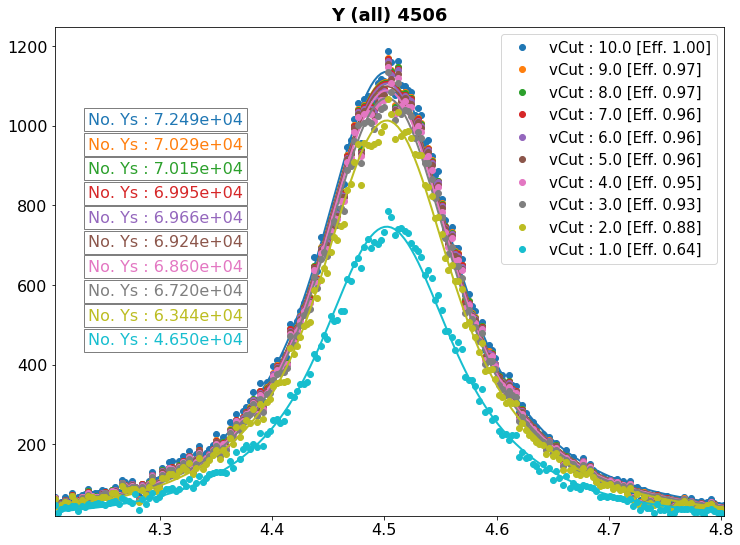

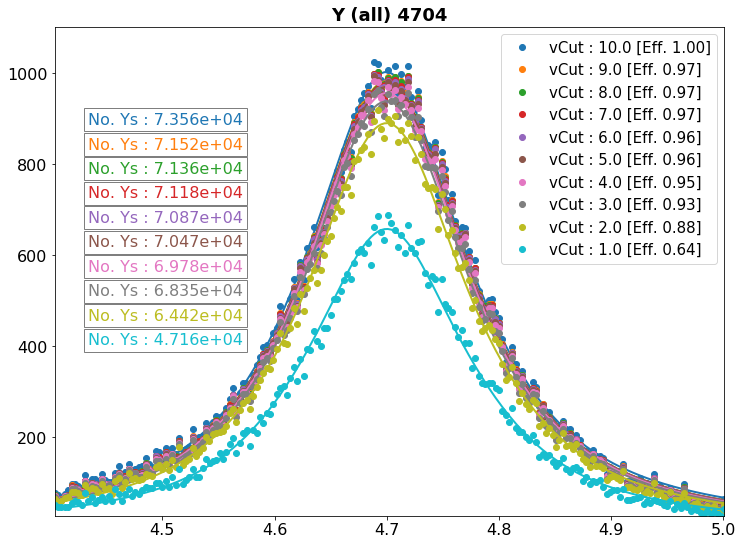

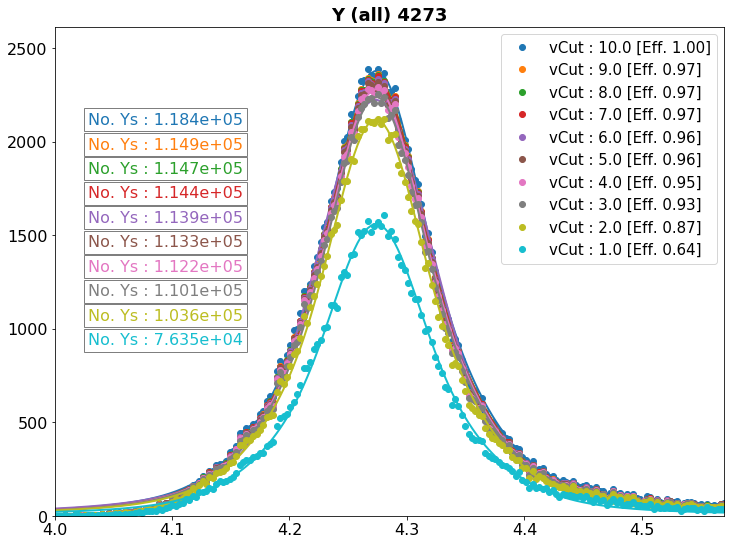

In [308]:
cuts = range(10,0,-1)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for k,d in myYsDf.iteritems():
    if "4140" in k:
            continue
    b_mass = yMasses[k]
    fig = plt.figure(figsize=(12,9))
    ystep = 0.0
    yEff[k] = []
    
    for hh,main,nev,vcut,c in zip(dats[k],fits[k],nevY[k],cuts,colors[:len(cuts)]):
        #plt.hist(dat[0],bins=int(ngraph))
        plt.plot(hh[1][:-1],hh[0],"o",c=c,label="vCut : %.1f [Eff. %.2f]"%(vcut,float(float(nev)/nevY[k][0]))) #c="black"
        plt.plot([b_mass],[max(main)*1.1])
        plt.plot(hh[1][:-1],main,linewidth=2,c=c) #c="blue"
        yEff[k].append(float(float(nev)/nevY[k][0]))
        ax = plt.gca()
        ax.margins(x=0,y=0,tight=False)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
        plt.title("Y (all) " + str(k[1:5]) ,fontsize=18,fontweight="bold")
        plt.legend(fontsize=15)
        ystep = ystep +0.05
        plt.text(0.05, .85-ystep, "No. Ys : %.3e" %nev,fontsize=16,bbox=dict(facecolor='white', alpha=0.5),transform=ax.transAxes,color=c)

# Y  v0 - Prompt

In [281]:
nevYPrompt = {}
datsPrompt = {}
fitsPrompt = {}
yPromptEff ={}

MnSeedGenerator: for initial parameters FCN = -115047.4982893
MnSeedGenerator: Initial state:   - FCN =  -115047.4982893 Edm =      17200.5 NCalls =     23
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -115047.4982893 Edm =      17200.5 NCalls =     23
VariableMetric: Iteration #   0 - FCN =  -115047.4982893 Edm =      17200.5 NCalls =     23
VariableMetric: Iteration #   1 - FCN =  -119203.9119173 Edm =      8177.53 NCalls =     39
VariableMetric: Iteration #   2 - FCN =  -121514.8388571 Edm =       360.77 NCalls =     53
VariableMetric: Iteration #   3 - FCN =  -122312.0000729 Edm =       148.59 NCalls =     66
VariableMetric: Iteration #   4 - FCN =  -122495.5000653 Edm =      28.6836 NCalls =     78
VariableMetric: Iteration #   5 - FCN =  -122538.6164731 Edm =      5.72575 NCalls =     90
VariableMetric: Iteration #   6 - FCN =    -122546.05578 Edm =       4.1738 NCalls =    102
VariableMetric: Iteration #   7 - FCN =  -122550.13511

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00443949
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -112877.2283282 Edm =   0.00191539 NCalls =    203
VariableMetric: Iteration #  12 - FCN =  -112877.2283282 Edm =   0.00191539 NCalls =    203


INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.00672801
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.00191539
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001
INFO:ROOT.Minuit2] VariableMetricBuilder: INVALID function minimum - edm is above tolerance, : edm = 0.00191539
INFO:ROOT.Minuit2] VariableMetricBuilder: Required tolerance  is 10 x edmval  : edmval = 0.0001




# of function calls: 203
minimum function Value: -112877.2283282
minimum edm: 0.001915392794535
minimum internal state vector: LAVector parameters:
    -0.9956826487107
  -0.009941084041765
     -1.023420331852
    -0.4528341942306
    -0.9681774693323

minimum internal covariance matrix: LASymMatrix parameters:
    0.044987171 -8.9372742e-06    0.011406805   0.0039751417    0.010799252
 -8.9372742e-06  1.9094353e-06 -2.3416021e-06  5.9616837e-08 -3.2290215e-06
    0.011406805 -2.3416021e-06   0.0031143672   0.0011002977   0.0025948288
   0.0039751417  5.9616837e-08   0.0011002977  0.00053903195  0.00075661874
    0.010799252 -3.2290215e-06   0.0025948288  0.00075661874   0.0028470965


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||    0.08043476254933 ||0.04063620512231
   1   ||      mean || limited ||      4.701017723909 ||0.0002931144295317
   2   ||   sigma_1 || limited ||    0.03745366670176 ||0.005122776679427
   3   ||   sigm


tab completion not implemented for this context


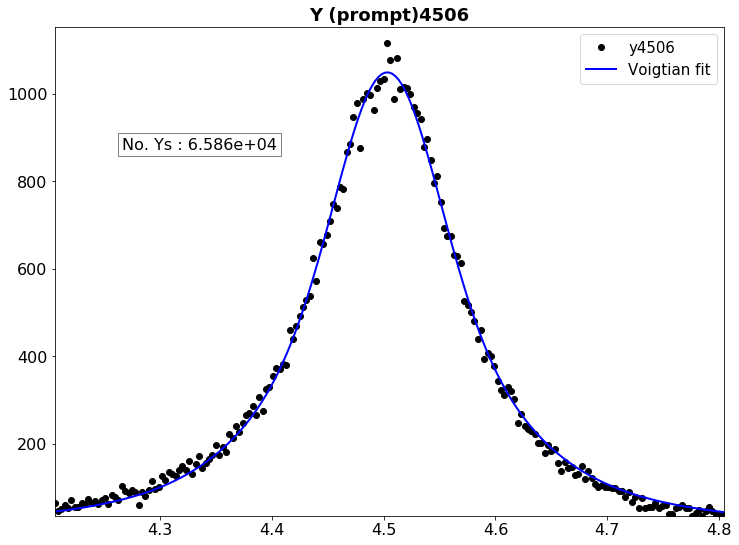

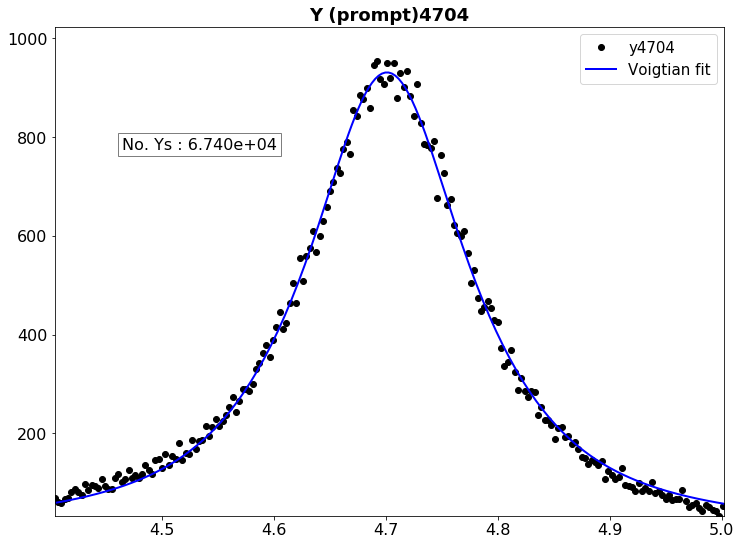

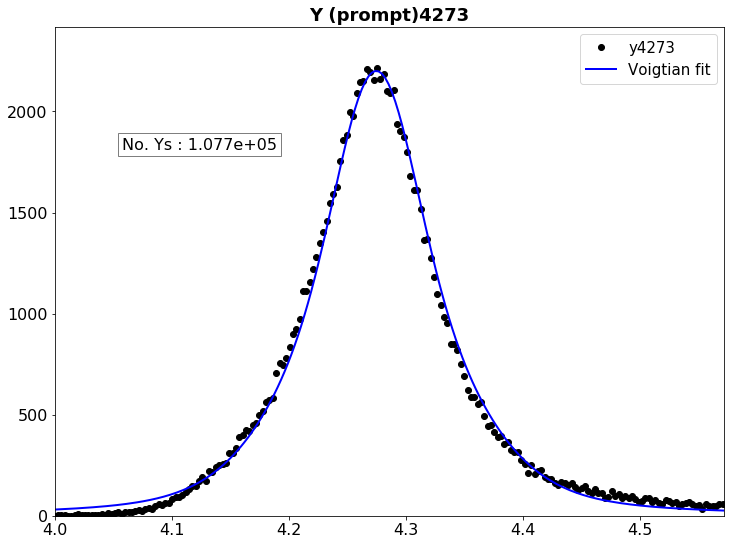

In [314]:
##Ys no cut
for k,d in myYsDf.iteritems():
    
    nevYPrompt[k] = []  
    datsPrompt[k] = []
    fitsPrompt[k] = []  
    
    if "4140" in k:
        continue
    nbins = 50.0
    ngraph = 200.0
    a = d[(d["highKaonMatch"]>0.0) & (d["highKaonMatch"]>0.0)].copy()
    a = a[a["dimuonditrk_ctauPV"]/a["dimuonditrk_ctauErrPV"]<2.0]
    a = a[(a["dimuonditrk_vChi2"]/a["dimuonditrk_nDof"]<10.0)]
    canvas = {}
    signal = {}
    entry = {}
    
    cut = 0.0
    
    b_min = yLimits[k][0]
    b_max = yLimits[k][1]
    b_mass = yMasses[k]


    #dat = a[a["dimuonditrk_m"]>mjpsi + mphi]["dimuonditrk_m"].values - a[a["dimuonditrk_m"]>mjpsi + mphi]["dimuon_m"].values + mjpsi
    dat = a["dimuonditrk_m"].values
    m = Observable("m",b_min,b_max)
    
    m.numbins = int(nbins)
    mean = Variable("mean",b_mass,b_min,b_max)
    sigma_1 = Variable("sigma_1",0.01,0.001,0.5)
    sig_1 = GaussianPdf("gauss_1",m,mean,sigma_1)

    sigma_2 = Variable("sigma_2",0.1,0.001,0.5)
    sig_2 = GaussianPdf("gauss_2",m,mean,sigma_2)
    gFrac = Variable("gFrac",0.05,0.0,1.0)
    
    sigma_3 = Variable("sigma_3",0.1,0.01,0.5)
    width = Variable("width",0.1,0.001,0.5)
    sig_3 = VoigtianPdf("voigt",m,mean,sigma_3,width)
    sFrac = Variable("sFrac",0.05,0.0,1.0)

    res = AddPdf("res",gFrac,sig_1,sig_3)
    sig = AddPdf("sig",sFrac,res,sig_3)
    #sigma_3 = Variable("sigma_3",0.1,0.001,0.5)
    #sig_3 = VoigtianPdf("gauss_3",m,mean,sigma_3,width)
    #gFrac_2 = Variable("gFrac_2",0.05,0.0,1.0)
    
    alpha = Variable("alpha",-0.5,-5.0,10.0)
    
    #sig = AddPdf("sig",gFrac_2,sig_0,sig_3)
    
    data = UnbinnedDataSet(m)

    bkg = ExpPdf("bkg",m,alpha)
    sFrac = Variable("sFrac",0.2,0.0,0.5)
    #nSig = Variable("nSig",1e3,10,1e5)
    #nBkg = Variable("nBkg",1e3,10,1e5)

    tot = res #AddPdf("add",[sFrac],[sig,bkg])
    data.from_matrix([dat], filter=True)

    tot.fitTo(data);

    dat = data.to_matrix()
    # Make grid and evaluate on it
    #m.numbins = 100
    #grid_data = tot.makeGrid()
    m.numbins = int(ngraph)
    grid = tot.makeGrid()
    tot.setData(grid)
    main, gauss, exp = tot.getCompProbsAtDataPoints()
    xvals = grid.to_matrix().flatten()
    nev = len(dat[0])
    mainSum = np.sum(main)
    main = np.multiply(main,nev)/np.sum(main)
    gauss = np.multiply(gauss,nev)/np.sum(gauss)
    exp = np.multiply(exp,nev)/np.sum(exp)
    hh = np.histogram(dat[0],bins=int(ngraph))#,range=(mean.value-0.5,mean.value+0.5))
    
    fig = plt.figure(figsize=(12,9))
    #plt.hist(dat[0],bins=int(ngraph))
    plt.plot(hh[1][:-1],hh[0],"o",c="black",label=str(k[:5]))
    plt.plot([mean.value],[max(main)*1.1])
    plt.plot(xvals,main,linewidth=2,c="blue",label="Voigtian fit")
    ax = plt.gca()
    ax.margins(x=0,y=0,tight=False)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    plt.title("Y (prompt)" + str(k[1:5]) ,fontsize=18,fontweight="bold")
    plt.legend(fontsize=15)
    plt.text(0.1, .75, "No. Ys : %.3e" %nev,fontsize=16,bbox=dict(facecolor='white', alpha=0.5),transform=ax.transAxes)
    #plt.plot(xvals,main)
    #plt.plot(xvals,gauss)
    #fig.patch.set_visible(False)
    
    nevYPrompt[k].append(nev)  
    datsPrompt[k].append(hh)
    fitsPrompt[k].append(main)
    

In [315]:
##Ys 

ngraph = 200
for k,d in myYsDf.iteritems(): 
    newYNev[k] = []
    for vCut in range(9,0,-1):
        if "4140" in k:
            continue

        a = d[(d["highKaonMatch"]>0.0) & (d["highKaonMatch"]>0.0)].copy()
        a = a[a["dimuonditrk_ctauPV"]/a["dimuonditrk_ctauErrPV"]<2.0]
        a = a[(a["dimuonditrk_vChi2"]/a["dimuonditrk_nDof"]<vCut)]
    
        canvas = {}
        signal = {}
        entry = {}

        cut = 0.0

        b_min = yLimits[k][0]
        b_max = yLimits[k][1]
        b_mass = yMasses[k]

        dat = a["dimuonditrk_m"].values #[a["dimuonditrk_m"]>mjpsi + mphi]["dimuonditrk_m"].values - a[a["dimuonditrk_m"]>mjpsi + mphi]["dimuon_m"].values + mjpsi

        m = Observable("m",b_min,b_max)

        mean = Variable("mean",b_mass,b_min,b_max)
        sigma_1 = Variable("sigma_1",0.01,0.001,0.5)
        sig_1 = GaussianPdf("gauss_1",m,mean,sigma_1)

        sigma_2 = Variable("sigma_2",0.1,0.001,0.5)
        width = Variable("width",0.1,0.001,0.5)
        #sig_2 = GaussianPdf("gauss_2",m,mean,sigma_2)
        sig_2 = VoigtianPdf("gauss_2",m,mean,sigma_2,width)
        gFrac = Variable("gFrac",0.05,0.0,1.0)

        sig = AddPdf("sig",gFrac,sig_1,sig_2)

        #sigma_3 = Variable("sigma_3",0.1,0.001,0.5)
        #sig_3 = VoigtianPdf("gauss_3",m,mean,sigma_3,width)
        #gFrac_2 = Variable("gFrac_2",0.05,0.0,1.0)

        alpha = Variable("alpha",-0.5,-5.0,10.0)

        #sig = AddPdf("sig",gFrac_2,sig_0,sig_3)

        data = UnbinnedDataSet(m)

        bkg = ExpPdf("bkg",m,alpha)
        sFrac = Variable("sFrac",0.2,0.0,0.5)
        #nSig = Variable("nSig",1e3,10,1e5)
        #nBkg = Variable("nBkg",1e3,10,1e5)

        tot = sig #AddPdf("add",[sFrac],[sig,bkg])
        data.from_matrix([dat], filter=True)

        tot.fitTo(data);

        dat = data.to_matrix()
        
        m.numbins = int(ngraph)
        grid = tot.makeGrid()
        tot.setData(grid)
        main, gauss, exp = tot.getCompProbsAtDataPoints()
        xvals = grid.to_matrix().flatten()
        nev = len(dat[0])
        mainSum = np.sum(main)
        main = np.multiply(main,nev)/np.sum(main)
        hh = np.histogram(dat[0],bins=int(ngraph))#,range=(mean.value-0.5,mean.value+0.5))
        
        nevYPrompt[k].append(nev)  
        datsPrompt[k].append(hh)
        fitsPrompt[k].append(main)
        

MnSeedGenerator: for initial parameters FCN = -114917.7159975
MnSeedGenerator: Initial state:   - FCN =  -114917.7159975 Edm =      17657.5 NCalls =     23
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -114917.7159975 Edm =      17657.5 NCalls =     23
VariableMetric: Iteration #   0 - FCN =  -114917.7159975 Edm =      17657.5 NCalls =     23
VariableMetric: Iteration #   1 - FCN =  -117730.7808612 Edm =      12287.8 NCalls =     35
VariableMetric: Iteration #   2 - FCN =  -120938.3202299 Edm =      1112.99 NCalls =     49
VariableMetric: Iteration #   3 - FCN =  -121956.2233078 Edm =      577.212 NCalls =     65
VariableMetric: Iteration #   4 - FCN =  -122340.2006311 Edm =      38.7507 NCalls =     78
VariableMetric: Iteration #   5 - FCN =  -122377.9095083 Edm =      14.6017 NCalls =     90
VariableMetric: Iteration #   6 - FCN =  -122417.3363975 Edm =      2.65094 NCalls =    104
VariableMetric: Iteration #   7 - FCN =  -122420.31087


   0   ||     gFrac || limited ||     0.2553644904916 ||0.0490301074017
   1   ||      mean || limited ||      4.503367776493 ||0.0002502155369419
   2   ||   sigma_1 || limited ||     0.0425305992154 ||0.002188528283422
   3   ||   sigma_2 || limited ||     0.1348882282662 ||0.004212286059379
   4   ||     width || limited ||    0.05678522160046 ||0.006552537833434




The minimization took: 513.06 ms
Average time per call: 1.1398 ms
MnSeedGenerator: for initial parameters FCN = -114469.5986292
MnSeedGenerator: Initial state:   - FCN =  -114469.5986292 Edm =      17678.6 NCalls =     23
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -114469.5986292 Edm =      17678.6 NCalls =     23
VariableMetric: Iteration #   0 - FCN =  -114469.5986292 Edm =      17678.6 NCalls =     23
VariableMetric: Iteration #   1 - FCN =  -117267.5035928 Edm =      12351.6 NCalls =     35
VariableMetric: Iteration #   2 - FCN =  -120479.0926732 Edm =      1151.0

   0.0090268892 -3.9669465e-06   0.0011788556  0.00090227449   0.0035021918


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||     0.2591707916789 ||0.04892966156432
   1   ||      mean || limited ||       4.50337038344 ||0.0002506981071191
   2   ||   sigma_1 || limited ||    0.04270667398147 ||0.002158907437597
   3   ||   sigma_2 || limited ||     0.1351223813815 ||0.004225482849473
   4   ||     width || limited ||    0.05704690005186 ||0.006591479120678




The minimization took: 442.55 ms
Average time per call: 1.1413 ms
MnSeedGenerator: for initial parameters FCN = -113464.367458
MnSeedGenerator: Initial state:   - FCN =   -113464.367458 Edm =      17606.1 NCalls =     23
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =   -113464.367458 Edm =      17606.1 NCalls =     23
VariableMetric: Iteration #   0 - FCN =   -113464.367458 Edm =      17606.1 NCalls =     23
VariableMetric: Iteration

INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.0072086
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.000112124
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001



Minuit did successfully converge.
# of function calls: 451
minimum function Value: -120940.2520036
minimum edm: 0.0001121239607249
minimum internal state vector: LAVector parameters:
    -0.4929919724481
  -0.008793717309649
    -0.9831070064618
    -0.4796878211044
    -0.8836538664942

minimum internal covariance matrix: LASymMatrix parameters:
    0.022712263  -8.470301e-06   0.0030884741   0.0028691603   0.0083026792
  -8.470301e-06  1.4029605e-06 -1.3032897e-06 -3.1919642e-07 -3.6547991e-06
   0.0030884741 -1.3032897e-06  0.00044582258  0.00043204525   0.0010825608
   0.0028691603 -3.1919642e-07  0.00043204525  0.00068966324  0.00078591525
   0.0083026792 -3.6547991e-06   0.0010825608  0.00078591525   0.0032857086


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||     0.2633681533304 ||0.04684894130446
   1   ||      mean || limited ||      4.503361918808 ||0.0002512535081505
   2   ||   sigma_1 || limited ||    0.04286010407483 ||

VariableMetric: Iteration #  26 - FCN =  -117821.4577735 Edm =  8.89383e-05 NCalls =    375

Minuit did successfully converge.
# of function calls: 375
minimum function Value: -117821.4577735
minimum edm: 8.89382753293e-05
minimum internal state vector: LAVector parameters:
    -0.5146997648099
  -0.008579223414345
    -0.9863845636451
     -0.480488124182
    -0.8953774741008

minimum internal covariance matrix: LASymMatrix parameters:
    0.029701844 -1.0935447e-05   0.0039974494   0.0040745686    0.010464518
 -1.0935447e-05  1.4357602e-06 -1.6422866e-06 -8.0158827e-07 -4.3854539e-06
   0.0039974494 -1.6422866e-06  0.00056692727   0.0005921368   0.0013575067
   0.0040745686 -8.0158827e-07   0.0005921368  0.00086898273   0.0011769492
    0.010464518 -4.3854539e-06   0.0013575067   0.0011769492   0.0039442319


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||     0.2538632328299 ||0.0529066608268
   1   ||      mean || limited ||      4.


Minuit did successfully converge.
# of function calls: 368
minimum function Value: -82751.06200412
minimum edm: 6.360471065977e-06
minimum internal state vector: LAVector parameters:
    -0.5759495238209
  -0.008548526130877
    -0.9982873729071
    -0.4997615648839
     -0.911203427052

minimum internal covariance matrix: LASymMatrix parameters:
    0.037934434 -1.3039136e-05   0.0053667783   0.0052176609    0.012072042
 -1.3039136e-05  2.0320522e-06 -2.4030672e-06 -1.1404293e-06 -4.4930461e-06
   0.0053667783 -2.4030672e-06  0.00080770591  0.00079788479   0.0016349243
   0.0052176609 -1.1404293e-06  0.00079788479   0.0010795083   0.0013513232
    0.012072042 -4.4930461e-06   0.0016349243   0.0013513232   0.0041616888


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||     0.2276843107571 ||0.05756944312191
   1   ||      mean || limited ||      4.503435473396 ||0.0003023832581506
   2   ||   sigma_1 || limited ||    0.04078416849806 ||

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.004453
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -112747.4819788 Edm =   0.00444691 NCalls =    206
VariableMetric: Iteration #  12 - FCN =  -112747.4819788 Edm =   0.00444691 NCalls =    206


INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.00672027
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.00444691
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001
INFO:ROOT.Minuit2] VariableMetricBuilder: INVALID function minimum - edm is above tolerance, : edm = 0.00444691
INFO:ROOT.Minuit2] VariableMetricBuilder: Required tolerance  is 10 x edmval  : edmval = 0.0001




# of function calls: 206
minimum function Value: -112747.4819788
minimum edm: 0.004446907387928
minimum internal state vector: LAVector parameters:
    -0.9973121635106
  -0.009904377423693
      -1.02371223977
    -0.4247421967128
    -0.9681569937713

minimum internal covariance matrix: LASymMatrix parameters:
    0.045235472 -8.7114274e-06    0.011543733   0.0038674968     0.01080346
 -8.7114274e-06  1.9119891e-06 -2.2992106e-06  8.0986213e-08 -3.1669864e-06
    0.011543733 -2.2992106e-06   0.0031703743   0.0010766996   0.0026131935
   0.0038674968  8.0986213e-08   0.0010766996  0.00050650482  0.00073284357
     0.01080346 -3.1669864e-06   0.0026131935  0.00073284357   0.0028338659


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||    0.07999214864176 ||0.04064486169536
   1   ||      mean || limited ||      4.701028735352 ||0.0002933104852696
   2   ||   sigma_1 || limited ||    0.03741577098822 ||0.005166134283606
   3   ||   sigm

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00456798
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -112547.6600659 Edm =   0.00661269 NCalls =    206
VariableMetric: Iteration #  12 - FCN =  -112547.6600659 Edm =   0.00661269 NCalls =    206


INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.00670836
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.00661269
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001
INFO:ROOT.Minuit2] VariableMetricBuilder: INVALID function minimum - edm is above tolerance, : edm = 0.00661269
INFO:ROOT.Minuit2] VariableMetricBuilder: Required tolerance  is 10 x edmval  : edmval = 0.0001




# of function calls: 206
minimum function Value: -112547.6600659
minimum edm: 0.006612692942504
minimum internal state vector: LAVector parameters:
    -0.9972446279744
  -0.009858787846247
     -1.023678205503
    -0.4245784103692
    -0.9686361265583

minimum internal covariance matrix: LASymMatrix parameters:
    0.045371649 -8.6627885e-06    0.011586181    0.003911547    0.010810257
 -8.6627885e-06  1.9142386e-06 -2.2942758e-06  7.7239223e-08 -3.1495974e-06
    0.011586181 -2.2942758e-06   0.0031844707   0.0010890022   0.0026157237
    0.003911547  7.7239223e-08   0.0010890022  0.00051305426  0.00074071729
    0.010810257 -3.1495974e-06   0.0026157237  0.00074071729   0.0028306033


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||    0.08001047071034 ||0.04070978781223
   1   ||      mean || limited ||      4.701042411557 ||0.0002934831137358
   2   ||   sigma_1 || limited ||    0.03742018840819 ||0.005177889797704
   3   ||   sigm

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00466665
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -112316.1208199 Edm =   0.00948262 NCalls =    204
VariableMetric: Iteration #  12 - FCN =  -112316.1208199 Edm =   0.00948262 NCalls =    204


INFO:ROOT.Minuit2] VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.00948262
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001


VariableMetric: Iteration #  13 - FCN =  -112316.1506585 Edm =    0.0077807 NCalls =    226
VariableMetric: Iteration #  14 - FCN =  -112316.1661402 Edm =    0.0137113 NCalls =    239
VariableMetric: Iteration #  15 - FCN =  -112316.1714213 Edm =   0.00149942 NCalls =    250
VariableMetric: Iteration #  16 - FCN =   -112316.173699 Edm =  0.000102505 NCalls =    263
VariableMetric: Iteration #  17 - FCN =  -112316.1737692 Edm =  1.20964e-05 NCalls =    276


INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00362418
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -112316.1737692 Edm =  2.10605e-05 NCalls =    315
VariableMetric: Iteration #  18 - FCN =  -112316.1737692 Edm =  2.10605e-05 NCalls =    315

Minuit did successfully converge.
# of function calls: 315
minimum function Value: -112316.1737692
minimum edm: 2.106047867054e-05
minimum internal state vector: LAVector parameters:
     -1.096942510561
   -0.00981467625927
     -1.052105627517
    -0.4327876270839
    -0.9913839706159

minimum internal covariance matrix: LASymMatrix parameters:
    0.056113551 -7.0252399e-06     0.01823673   0.0034507832      0.0127555
 -7.0252399e-06  1.9183587e-06 -2.2781846e-06  3.1282684e-07 -2.6976345e-06
     0.01823673 -2.2781846e-06   0.0062938001   0.0012167722   0.0039811732
   0.0034507832  3.1282684e-07   0.0012167722  0.00035778522  0.00061860695
      0.0127555 -2.6976345e-06   0.0039811732  0.00061860695   0.0031345529


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac 

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00474185
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -111946.7376991 Edm =    0.0358708 NCalls =    200
VariableMetric: Iteration #  12 - FCN =  -111946.7376991 Edm =    0.0358708 NCalls =    200


INFO:ROOT.Minuit2] VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.0358708
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001


VariableMetric: Iteration #  13 - FCN =  -111946.8179732 Edm =    0.0216057 NCalls =    218
VariableMetric: Iteration #  14 - FCN =  -111946.8512179 Edm =     0.069275 NCalls =    230
VariableMetric: Iteration #  15 - FCN =  -111946.8788244 Edm =   0.00878263 NCalls =    242
VariableMetric: Iteration #  16 - FCN =  -111946.8953815 Edm =   0.00239913 NCalls =    254
VariableMetric: Iteration #  17 - FCN =  -111946.8984126 Edm =  0.000289127 NCalls =    266
VariableMetric: Iteration #  18 - FCN =    -111946.89854 Edm =  3.31161e-05 NCalls =    278
VariableMetric: After Hessian   - FCN =    -111946.89854 Edm =  1.52884e-05 NCalls =    315
VariableMetric: Iteration #  19 - FCN =    -111946.89854 Edm =  1.52884e-05 NCalls =    315

Minuit did successfully converge.
# of function calls: 315
minimum function Value: -111946.89854
minimum edm: 1.528844575609e-05
minimum internal state vector: LAVector parameters:
      -1.13913850513
  -0.009755667825988
     -1.067679376631
    -0.437247152730

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00451905
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -111413.0153427 Edm =    0.0118467 NCalls =    202
VariableMetric: Iteration #  12 - FCN =  -111413.0153427 Edm =    0.0118467 NCalls =    202


INFO:ROOT.Minuit2] VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.0118467
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001


VariableMetric: Iteration #  13 - FCN =  -111413.0487324 Edm =   0.00763802 NCalls =    223
VariableMetric: Iteration #  14 - FCN =  -111413.0630615 Edm =     0.013715 NCalls =    236
VariableMetric: Iteration #  15 - FCN =  -111413.0693732 Edm =   0.00155383 NCalls =    248
VariableMetric: Iteration #  16 - FCN =  -111413.0714416 Edm =  0.000105999 NCalls =    261
VariableMetric: Iteration #  17 - FCN =   -111413.071532 Edm =  6.15142e-06 NCalls =    274


INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00339993
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =   -111413.071532 Edm =   1.8082e-05 NCalls =    313
VariableMetric: Iteration #  18 - FCN =   -111413.071532 Edm =   1.8082e-05 NCalls =    313

Minuit did successfully converge.
# of function calls: 313
minimum function Value: -111413.071532
minimum edm: 1.808199976091e-05
minimum internal state vector: LAVector parameters:
     -1.095148648016
  -0.009837397466989
     -1.053355851486
     -0.435340378192
     -0.989095285889

minimum internal covariance matrix: LASymMatrix parameters:
    0.055746138 -6.0701047e-06    0.018301734   0.0033375005     0.01271254
 -6.0701047e-06  1.9308415e-06  -2.040952e-06  3.7790449e-07 -2.4606885e-06
    0.018301734  -2.040952e-06   0.0063666087   0.0011891804   0.0040145942
   0.0033375005  3.7790449e-07   0.0011891804  0.00034665856    0.000596058
     0.01271254 -2.4606885e-06   0.0040145942    0.000596058   0.0031297883


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac |

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00441091
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -110484.9693518 Edm =  0.000490821 NCalls =    205
VariableMetric: Iteration #  12 - FCN =  -110484.9693518 Edm =  0.000490821 NCalls =    205


INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.00658542
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.000490821
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001



Minuit did successfully converge.
# of function calls: 205
minimum function Value: -110484.9693518
minimum edm: 0.0004908209523395
minimum internal state vector: LAVector parameters:
      -1.00146878473
  -0.009900429817496
     -1.024864419366
    -0.4289918364472
    -0.9675163447321

minimum internal covariance matrix: LASymMatrix parameters:
    0.046704707 -8.7896113e-06    0.012035087   0.0039030514    0.011021577
 -8.7896113e-06  1.9461579e-06  -2.381794e-06  6.0385727e-08 -3.1117777e-06
    0.012035087  -2.381794e-06   0.0033341367   0.0010969133   0.0026949125
   0.0039030514  6.0385727e-08   0.0010969133  0.00050336507  0.00073024625
    0.011021577 -3.1117777e-06   0.0026949125  0.00073024625   0.0028529194


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||     0.0788681676829 ||0.04102848508491
   1   ||      mean || limited ||      4.701029919576 ||0.0002959197426158
   2   ||   sigma_1 || limited ||    0.03726637143529 ||

INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00433466
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -108563.5022544 Edm =    0.0172953 NCalls =    204
VariableMetric: Iteration #  12 - FCN =  -108563.5022544 Edm =    0.0172953 NCalls =    204


INFO:ROOT.Minuit2] VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.0172953
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001


VariableMetric: Iteration #  13 - FCN =  -108563.5515929 Edm =    0.0112063 NCalls =    227
VariableMetric: Iteration #  14 - FCN =  -108563.5897346 Edm =    0.0158052 NCalls =    241
VariableMetric: Iteration #  15 - FCN =  -108563.5995279 Edm =    0.0163945 NCalls =    253
VariableMetric: Iteration #  16 - FCN =  -108563.6052847 Edm =   0.00324074 NCalls =    265
VariableMetric: Iteration #  17 - FCN =  -108563.6112343 Edm =   0.00250057 NCalls =    280
VariableMetric: Iteration #  18 - FCN =  -108563.6137543 Edm =   0.00105724 NCalls =    292
VariableMetric: Iteration #  19 - FCN =  -108563.6155563 Edm =  0.000255824 NCalls =    307
VariableMetric: Iteration #  20 - FCN =  -108563.6157718 Edm =  4.48767e-05 NCalls =    318


INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 0.00427521
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -108563.6157718 Edm =   3.2337e-05 NCalls =    357
VariableMetric: Iteration #  21 - FCN =  -108563.6157718 Edm =   3.2337e-05 NCalls =    357

Minuit did successfully converge.
# of function calls: 357
minimum function Value: -108563.6157718
minimum edm: 3.233700496914e-05
minimum internal state vector: LAVector parameters:
    -0.8094959792065
   -0.00984497472634
    -0.9834837068997
    -0.4127563422844
    -0.9174333986539

minimum internal covariance matrix: LASymMatrix parameters:
    0.033221197 -1.1843357e-05   0.0062086671   0.0036704461   0.0093362306
 -1.1843357e-05  1.9795478e-06 -2.3922737e-06  -2.904403e-07 -4.3687712e-06
   0.0062086671 -2.3922737e-06    0.001263187  0.00076841993   0.0016349758
   0.0036704461  -2.904403e-07  0.00076841993  0.00068305679  0.00076772214
   0.0093362306 -4.3687712e-06   0.0016349758  0.00076772214   0.0029213681


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac 

INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.00612811
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.00256946
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001
INFO:ROOT.Minuit2] VariableMetricBuilder: INVALID function minimum - edm is above tolerance, : edm = 0.00256946
INFO:ROOT.Minuit2] VariableMetricBuilder: Required tolerance  is 10 x edmval  : edmval = 0.0001




# of function calls: 203
minimum function Value: -102812.5579811
minimum edm: 0.002569464369319
minimum internal state vector: LAVector parameters:
     -0.998951974933
  -0.009401792280055
     -1.029317159109
     -0.436362300894
    -0.9624250698395

minimum internal covariance matrix: LASymMatrix parameters:
      4.7697738   -0.001048103      1.2472331     0.34783187       1.170907
   -0.001048103   2.316871e-06  -0.0002743387 -7.5587715e-05 -0.00025833456
      1.2472331  -0.0002743387     0.32636747    0.091048449      0.3060322
     0.34783187 -7.5587715e-05    0.091048449    0.025562776    0.085181002
       1.170907 -0.00025833456      0.3060322    0.085181002     0.28770244


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||    0.07954786378314 ||0.5694096515426
   1   ||      mean || limited ||      4.701179503869 ||0.0003228775910751
   2   ||   sigma_1 || limited ||    0.03669166112748 ||0.05054524616258
   3   ||   sigma_


   0   ||     gFrac || limited ||     0.3775909397354 ||0.01087805875135
   1   ||      mean || limited ||      4.274562477984 ||0.0001418671623599
   2   ||   sigma_1 || limited ||     0.0690436522832 ||0.0007921604452628
   3   ||   sigma_2 || limited ||    0.07217556396487 ||0.001796303233261
   4   ||     width || limited ||    0.01884604027848 ||0.001296421689366




The minimization took: 492.17 ms
Average time per call: 1.2563 ms
MnSeedGenerator: for initial parameters FCN = -221494.7743102
MnSeedGenerator: Initial state:   - FCN =  -221494.7743102 Edm =  1.10569e+06 NCalls =     23
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -221494.7743102 Edm =  1.10569e+06 NCalls =     23
VariableMetric: Iteration #   0 - FCN =  -221494.7743102 Edm =  1.10569e+06 NCalls =     23
VariableMetric: Iteration #   1 - FCN =  -251280.5421774 Edm =       136837 NCalls =     53
VariableMetric: Iteration #   2 - FCN =  -253784.8055443 Edm =      5880

VariableMetric: Iteration #  13 - FCN =  -260165.5988222 Edm =   7.8451e-09 NCalls =    205
VariableMetric: After Hessian   - FCN =  -260165.5988222 Edm =  2.05569e-07 NCalls =    244
VariableMetric: Iteration #  14 - FCN =  -260165.5988222 Edm =  2.05569e-07 NCalls =    244

Minuit did successfully converge.
# of function calls: 244
minimum function Value: -260165.5988222
minimum edm: 2.055688493184e-07
minimum internal state vector: LAVector parameters:
    -0.5700833010249
   -0.04157197296027
     -1.073442347808
     -2.210544582502
     -8.532896402286

minimum internal covariance matrix: LASymMatrix parameters:
   0.0018077832  1.8500434e-06  0.00031167335 -8.9037081e-05 -0.00027094284
  1.8500434e-06  4.9448678e-07  1.8705857e-07    5.51788e-07 -6.6457825e-07
  0.00031167335  1.8705857e-07  6.4946937e-05 -2.2468346e-05 -4.1407468e-05
 -8.9037081e-05    5.51788e-07 -2.2468346e-05  6.3927486e-05 -1.3152519e-05
 -0.00027094284 -6.6457825e-07 -4.1407468e-05 -1.3152519e-05  5.666437



# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     gFrac || limited ||     0.2281452410942 ||0.01293565609666
   1   ||      mean || limited ||      4.274595628199 ||0.0001431581396818
   2   ||   sigma_1 || limited ||    0.03121092452636 ||0.0006964730950669
   3   ||   sigma_2 || limited ||    0.05015993175781 ||0.000841436735819
   4   ||     width || limited ||    0.05613675781078 ||0.000829841353206




The minimization took: 474.54 ms
Average time per call: 1.2238 ms
MnSeedGenerator: for initial parameters FCN = -213346.755571
MnSeedGenerator: Initial state:   - FCN =   -213346.755571 Edm =  1.22684e+06 NCalls =     23
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =   -213346.755571 Edm =  1.22684e+06 NCalls =     23
VariableMetric: Iteration #   0 - FCN =   -213346.755571 Edm =  1.22684e+06 NCalls =     23
VariableMetric: Iteration #   1 - FCN =  -241707.2127264 Edm =       301627 NCalls =     48
Variable

VariableMetric: Iteration #   7 - FCN =  -177059.4141565 Edm =      59.2531 NCalls =    150
VariableMetric: Iteration #   8 - FCN =  -177200.6071202 Edm =       51.765 NCalls =    163
VariableMetric: Iteration #   9 - FCN =  -177254.9744875 Edm =      5.33835 NCalls =    175
VariableMetric: Iteration #  10 - FCN =  -177265.9617332 Edm =      1.08507 NCalls =    187
VariableMetric: Iteration #  11 - FCN =   -177267.823444 Edm =      1.06325 NCalls =    199
VariableMetric: Iteration #  12 - FCN =  -177271.6713745 Edm =      4.56423 NCalls =    213
VariableMetric: Iteration #  13 - FCN =  -177290.3427763 Edm =      2.92337 NCalls =    228
VariableMetric: Iteration #  14 - FCN =   -177293.262627 Edm =      1.05567 NCalls =    239
VariableMetric: Iteration #  15 - FCN =  -177294.4436486 Edm =    0.0777282 NCalls =    251
VariableMetric: Iteration #  16 - FCN =  -177294.5173154 Edm =   0.00385214 NCalls =    262
VariableMetric: Iteration #  17 - FCN =  -177294.5206562 Edm =  4.83742e-05 NCal

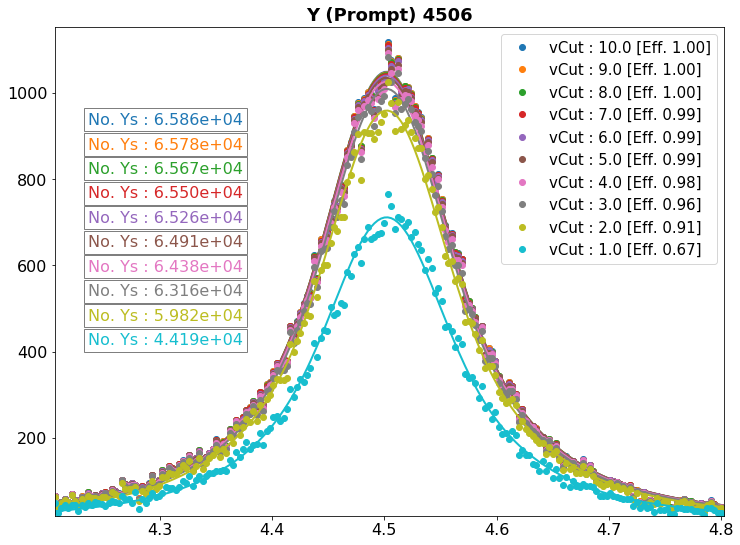

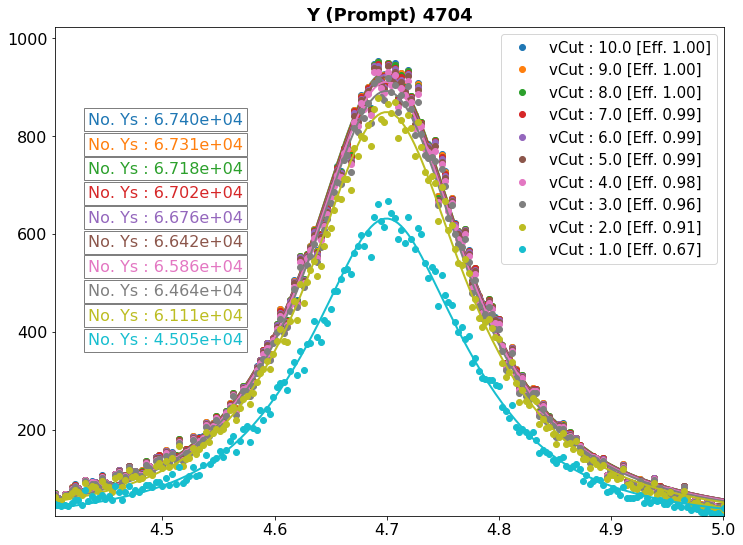

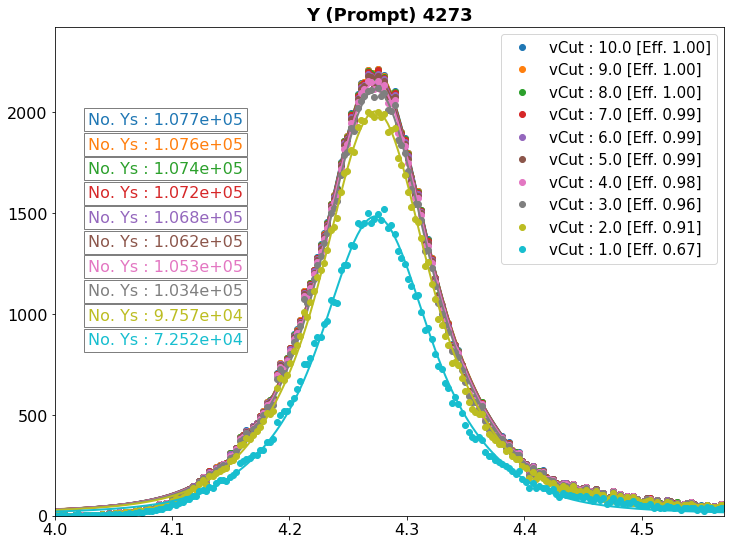

In [316]:
cuts = range(10,0,-1)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for k,d in myYsDf.iteritems():
    if "4140" in k:
            continue
    b_mass = yMasses[k]
    fig = plt.figure(figsize=(12,9))
    ystep = 0.0
    yPromptEff[k] = []
    
    for hh,main,nev,vcut,c in zip(datsPrompt[k],fitsPrompt[k],nevYPrompt[k],cuts,colors[:len(cuts)]):
        #plt.hist(dat[0],bins=int(ngraph))
        plt.plot(hh[1][:-1],hh[0],"o",c=c,label="vCut : %.1f [Eff. %.2f]"%(vcut,float(float(nev)/nevYPrompt[k][0]))) #c="black"
        plt.plot([b_mass],[max(main)*1.1])
        plt.plot(hh[1][:-1],main,linewidth=2,c=c) #c="blue"
        yPromptEff[k].append(float(float(nev)/nevYPrompt[k][0]))
        ax = plt.gca()
        ax.margins(x=0,y=0,tight=False)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
        plt.title("Y (Prompt) " + str(k[1:5]) ,fontsize=18,fontweight="bold")
        plt.legend(fontsize=15)
        ystep = ystep +0.05
        plt.text(0.05, .85-ystep, "No. Ys : %.3e" %nev,fontsize=16,bbox=dict(facecolor='white', alpha=0.5),transform=ax.transAxes,color=c)

# 2018 Data Sample

In [288]:
bbbar_data = pd.read_hdf(data_path + "2mu2k_2018_tree.h5")

In [289]:
print "Num. µµkk cands: %d" % len(bbbar_data)

Num. µµkk cands: 2136110


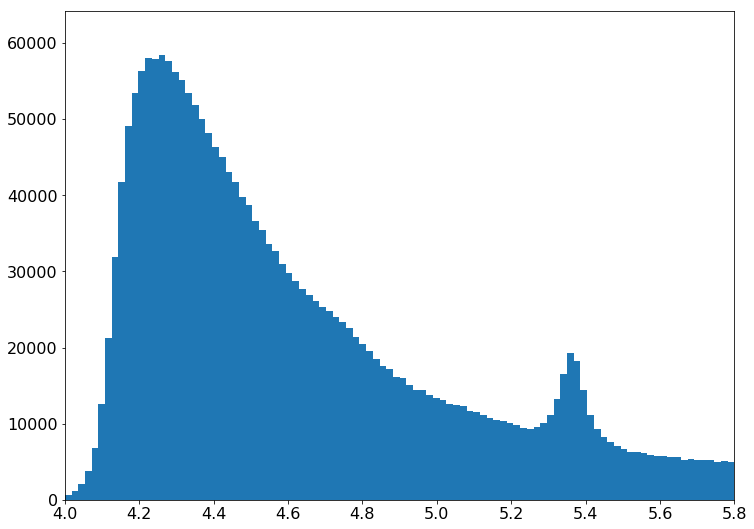

In [290]:
plt.figure(figsize=(12,9))
bbh = plt.hist(bbbar_data["xM"],bins = 100);
plt.plot([4.2],np.max(bbh[0])*1.1)
ax = plt.gca()
ax.margins(x=0,y=0,tight=False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

# B0s  v0

MnSeedGenerator: for initial parameters FCN = -444254.7485257
MnSeedGenerator: Initial state:   - FCN =  -444254.7485257 Edm =     -28829.9 NCalls =     27
MnSeedGenerator: Negative G2 found - new state:   - FCN =  -466339.4209241 Edm =      4103.49 NCalls =    110
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -466339.4209241 Edm =      4103.49 NCalls =    110
VariableMetric: Iteration #   0 - FCN =  -466339.4209241 Edm =      4103.49 NCalls =    110
VariableMetric: Iteration #   1 - FCN =  -470032.9150356 Edm =      510.094 NCalls =    127
VariableMetric: Iteration #   2 - FCN =  -470321.8195306 Edm =      91.3951 NCalls =    145
VariableMetric: Iteration #   3 - FCN =  -470395.8484097 Edm =       2.0741 NCalls =    158
VariableMetric: Iteration #   4 - FCN =  -470398.4700811 Edm =     0.261704 NCalls =    172
VariableMetric: Iteration #   5 - FCN =  -470398.8313379 Edm =     0.178911 NCalls =    186
VariableMetric: Iteration #   6 - FC

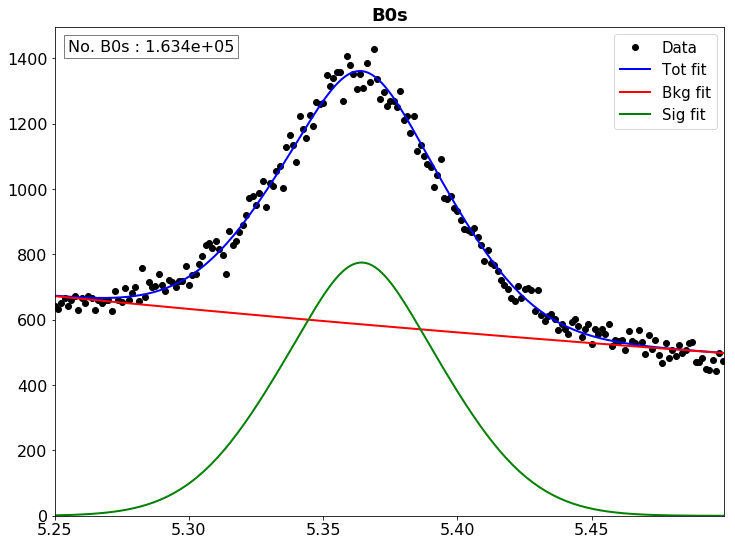

In [265]:
##B0 no cut

b_min = 5.25
b_max = 5.50
b_mass = 5.35

nevNB0s = []  
datsNB0s = []
fitsNB0s = []
ratioB0s = []

dat = bbbar_data["xM"].values

m = Observable("m",b_min,b_max)

mean = Variable("mean",b_mass,b_min,b_max)
sigma_1 = Variable("sigma_1",0.01,0.001,0.5)
sig_1 = GaussianPdf("gauss_1",m,mean,sigma_1)

sigma_2 = Variable("sigma_2",0.1,0.001,0.5)
sig_2 = GaussianPdf("gauss_2",m,mean,sigma_2)
gFrac = Variable("gFrac",0.05,0.0,1.0)

sig = AddPdf("sig",gFrac,sig_1,sig_2)
alpha = Variable("alpha",-0.5,-5.0,10.0)

data = UnbinnedDataSet(m)

bkg = ExpPdf("bkg",m,alpha)
sFrac = Variable("sFrac",0.2,0.0,0.5)
#nSig = Variable("nSig",1e3,10,1e5)
#nBkg = Variable("nBkg",1e3,10,1e5)

tot = AddPdf("add",[sFrac],[sig,bkg])
data.from_matrix([dat], filter=True)

tot.fitTo(data);

s = (sFrac.value)
b = (1.0-sFrac.value)

dat = data.to_matrix()

plt.figure(figsize=(12,9))
print(dat, dat[0].shape)

m.numbins = int(ngraph)
# Make grid and evaluate on it
grid = tot.makeGrid()
tot.setData(grid)
allcomps = tot.getCompProbsAtDataPoints()
main, gauss, exp = tot.getCompProbsAtDataPoints()
xvals = grid.to_matrix().flatten()
nev = len(dat[0])
mainSum = np.sum(main)
main = np.multiply(main,nev)/np.sum(main)
gauss = np.multiply(gauss,nev*s)/np.sum(gauss) 

exp = np.multiply(exp,nev*b)/np.sum(exp)

hh = np.histogram(dat[0],bins=int(ngraph))

fig = plt.figure(figsize=(12,9))
#plt.hist(dat[0],bins=int(ngraph))
plt.plot(hh[1][:-1],hh[0],"o",c="black",label="Data")
plt.plot([b_mass],[max(main)*1.1])
plt.plot(xvals,main,linewidth=2,c="blue",label="Tot fit")
plt.plot(xvals,exp,linewidth=2,c="red",label="Bkg fit")
plt.plot(xvals,gauss,linewidth=2,c="green",label="Sig fit")

ax = plt.gca()
ax.margins(x=0,y=0,tight=False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.title("B0s",fontsize=18,fontweight="bold")
plt.legend(fontsize=15)
plt.text(0.02, .95, "No. B0s : %.3e" %nev,fontsize=16,bbox=dict(facecolor='white', alpha=0.5),transform=ax.transAxes)
#plt.plot(xvals,main)
#plt.plot(xvals,gauss)

ratioB0s.append(float(s)/float(b))
nevNB0s.append(nev)
datsNB0s.append(hh)
fitsNB0s.append([main,exp])
        

MnSeedGenerator: for initial parameters FCN = -394001.6221341
MnSeedGenerator: Initial state:   - FCN =  -394001.6221341 Edm =     -22520.7 NCalls =     27
MnSeedGenerator: Negative G2 found - new state:   - FCN =  -415106.1511288 Edm =       5457.1 NCalls =    103
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -415106.1511288 Edm =       5457.1 NCalls =    103
VariableMetric: Iteration #   0 - FCN =  -415106.1511288 Edm =       5457.1 NCalls =    103
VariableMetric: Iteration #   1 - FCN =  -419588.5349134 Edm =      1734.59 NCalls =    124
VariableMetric: Iteration #   2 - FCN =   -420130.678849 Edm =      169.512 NCalls =    142
VariableMetric: Iteration #   3 - FCN =  -420237.4128466 Edm =      12.3321 NCalls =    156
VariableMetric: Iteration #   4 - FCN =  -420251.6284942 Edm =      1.41215 NCalls =    170
VariableMetric: Iteration #   5 - FCN =  -420253.7408812 Edm =     0.862827 NCalls =    184
VariableMetric: Iteration #   6 - FC

INFO:ROOT.Minuit2] VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
INFO:ROOT.Minuit2] Edm is smaller than machine accuracy : machineLimit = 0.0241886
INFO:ROOT.Minuit2] Current  Edm is : edm = 0.000207672
INFO:ROOT.Minuit2] Required Edm is : edmval = 0.0001



Minuit did successfully converge.
# of function calls: 317
minimum function Value: -405817.1574794
minimum edm: 0.0002076719911912
minimum internal state vector: LAVector parameters:
     0.3578881846372
     -1.089764145094
    -0.0838961013065
     -1.247250411192
     -1.059076666088
    -0.5423667370386

minimum internal covariance matrix: LASymMatrix parameters:
  0.00026294309  0.00030467182 -2.3653338e-06  4.7000121e-05   4.464245e-05  1.2928166e-05
  0.00030467182   0.0082240367  8.2113369e-06   0.0021394049  0.00030710077 -5.3167098e-06
 -2.3653338e-06  8.2113369e-06  5.1570598e-06   2.525731e-06 -1.2199771e-09 -7.3826933e-06
  4.7000121e-05   0.0021394049   2.525731e-06  0.00081295021  6.5119607e-05 -3.0113264e-06
   4.464245e-05  0.00030710077 -1.2199771e-09  6.5119607e-05  2.0137187e-05  1.5791415e-06
  1.2928166e-05 -5.3167098e-06 -7.3826933e-06 -3.0113264e-06  1.5791415e-06  6.5572164e-05


# ext. ||   Name    ||   type  ||     Value     ||  Error +/- 

   0   ||     sFr

   5   ||     alpha || limited ||     -1.437180599142 ||0.03999668687043




The minimization took: 626.07 ms
Average time per call: 1.8195 ms
(array([[5.27375078, 5.47933578, 5.37535048, ..., 5.26749516, 5.36632967,
        5.46442318]]), (125282,))
MnSeedGenerator: for initial parameters FCN = -317903.8764141
MnSeedGenerator: Initial state:   - FCN =  -317903.8764141 Edm =     -15656.9 NCalls =     27
MnSeedGenerator: Negative G2 found - new state:   - FCN =  -337279.0545473 Edm =      8223.35 NCalls =    102
VariableMetric: start iterating until Edm is < 0.0001
VariableMetric: Initial state   - FCN =  -337279.0545473 Edm =      8223.35 NCalls =    102
VariableMetric: Iteration #   0 - FCN =  -337279.0545473 Edm =      8223.35 NCalls =    102
VariableMetric: Iteration #   1 - FCN =  -343669.4940893 Edm =       2959.1 NCalls =    122
VariableMetric: Iteration #   2 - FCN =  -344608.6855494 Edm =      382.352 NCalls =    140
VariableMetric: Iteration #   3 - FCN =  -344816.4648075 Edm 

VariableMetric: Iteration #   5 - FCN =  -280409.5897339 Edm =      3.57384 NCalls =    190
VariableMetric: Iteration #   6 - FCN =   -280418.751243 Edm =      1.68817 NCalls =    205
VariableMetric: Iteration #   7 - FCN =  -280426.4605687 Edm =      3.85709 NCalls =    224
VariableMetric: Iteration #   8 - FCN =  -280434.1729619 Edm =      4.19083 NCalls =    245
VariableMetric: Iteration #   9 - FCN =  -280438.9038847 Edm =     0.477771 NCalls =    259
VariableMetric: Iteration #  10 - FCN =  -280439.6156702 Edm =    0.0930084 NCalls =    273
VariableMetric: Iteration #  11 - FCN =  -280440.0802544 Edm =     0.226943 NCalls =    287
VariableMetric: Iteration #  12 - FCN =  -280440.4597644 Edm =     0.283506 NCalls =    301
VariableMetric: Iteration #  13 - FCN =    -280441.11596 Edm =     0.230429 NCalls =    315
VariableMetric: Iteration #  14 - FCN =  -280441.4872859 Edm =    0.0109085 NCalls =    329
VariableMetric: Iteration #  15 - FCN =  -280441.4961608 Edm =   0.00026264 NCal

VariableMetric: Iteration #  10 - FCN =  -132844.3200981 Edm =    0.0127516 NCalls =    266
VariableMetric: Iteration #  11 - FCN =  -132844.3350435 Edm =  0.000502526 NCalls =    280
VariableMetric: Iteration #  12 - FCN =  -132844.3354735 Edm =   6.7112e-07 NCalls =    294


INFO:ROOT.Minuit2] matrix forced pos-def by adding to diagonal : padd = 157.117
INFO:ROOT.Minuit2] MnHesse: matrix was forced pos. def. 


VariableMetric: After Hessian   - FCN =  -132844.3354735 Edm =  2.74048e-05 NCalls =    344
VariableMetric: Iteration #  13 - FCN =  -132844.3354735 Edm =  2.74048e-05 NCalls =    344

Minuit did successfully converge.
# of function calls: 344
minimum function Value: -132844.3354735
minimum edm: 2.740477955225e-05
minimum internal state vector: LAVector parameters:
      1.570809849708
     -1.055835073176
    -0.0820904091909
     -1.104031473242
     -1.103979654475
    -0.7036768126557

minimum internal covariance matrix: LASymMatrix parameters:
  7.1175778e-06   0.0005496211  1.1376494e-12 -9.0169381e-08  4.9592923e-10   6.329003e-12
   0.0005496211      53441.075  3.8324019e-05     -8.7605953    0.049184202  0.00046378721
  1.1376494e-12  3.8324019e-05  3.0368236e-08 -6.2871932e-09  3.4569772e-11 -5.0829839e-10
 -9.0169381e-08     -8.7605953 -6.2871932e-09   0.0014390237  -8.063931e-06 -7.6089774e-08
  4.9592923e-10    0.049184202  3.4569772e-11  -8.063931e-06  7.3801033e-08  4.18

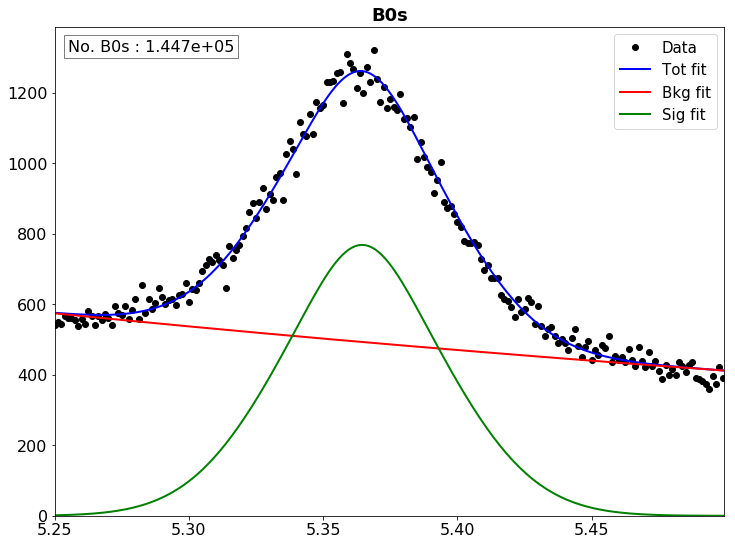

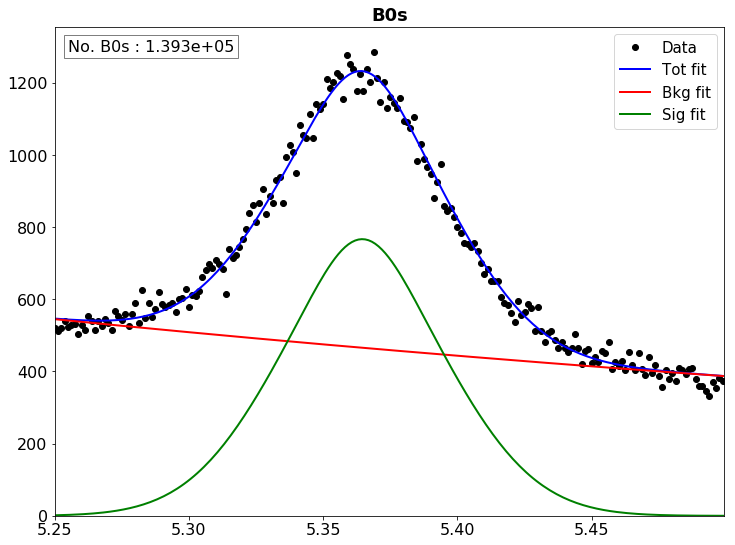

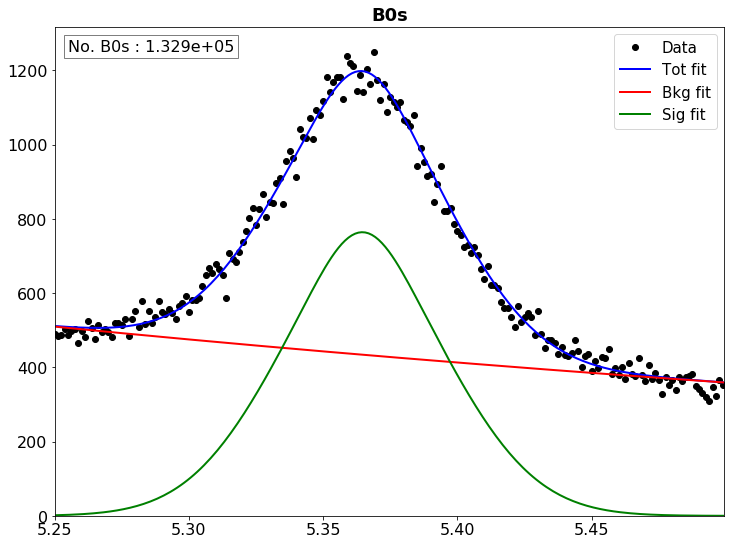

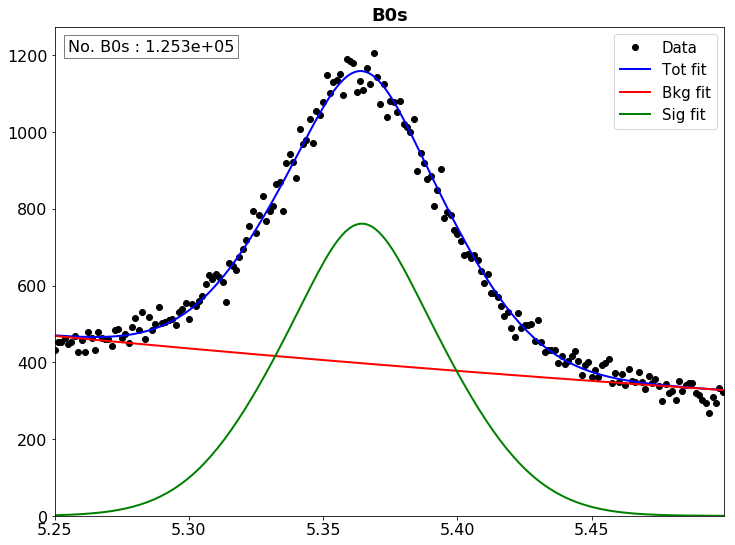

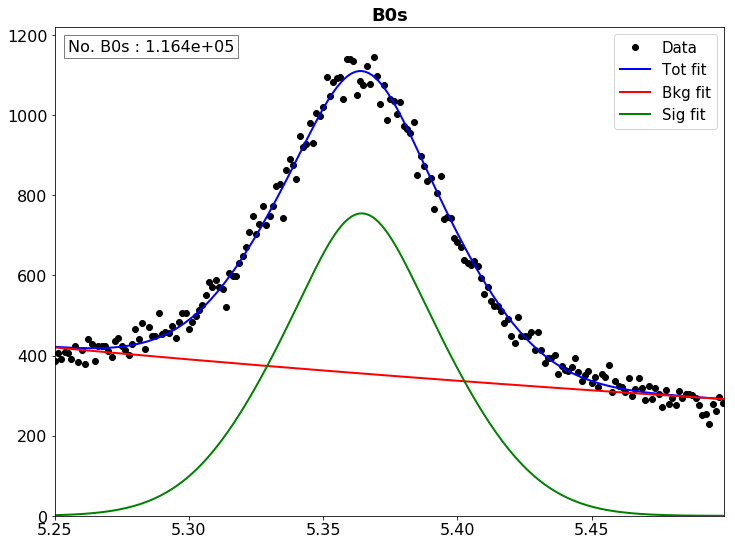

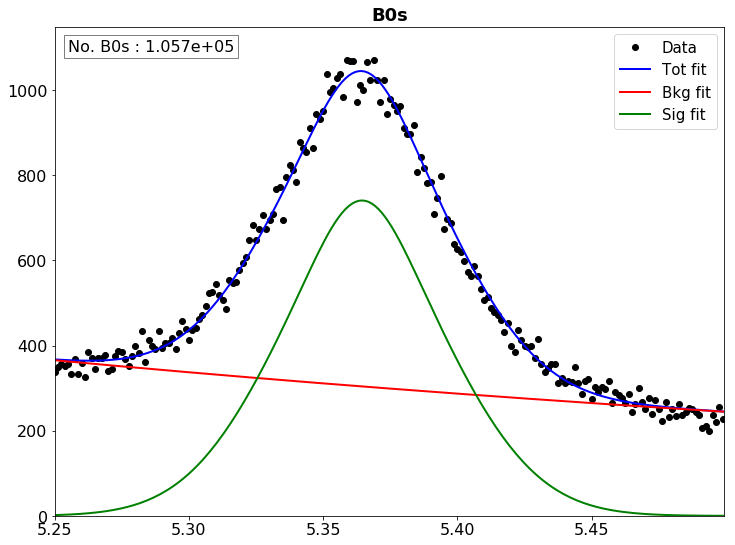

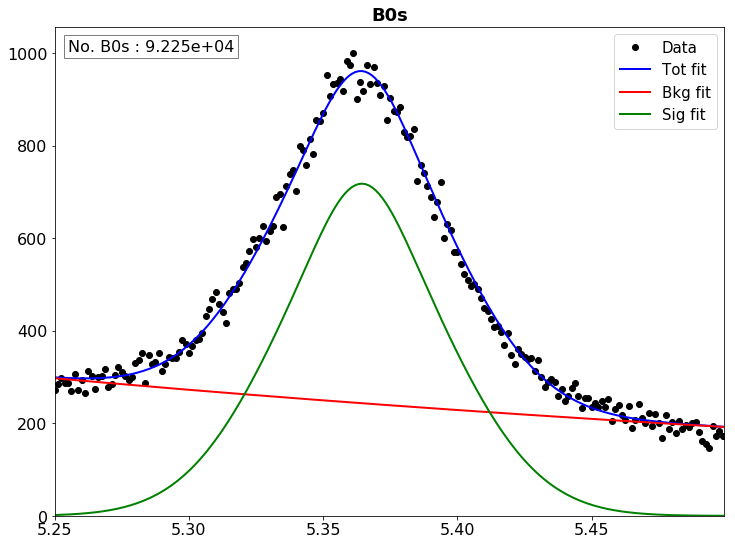

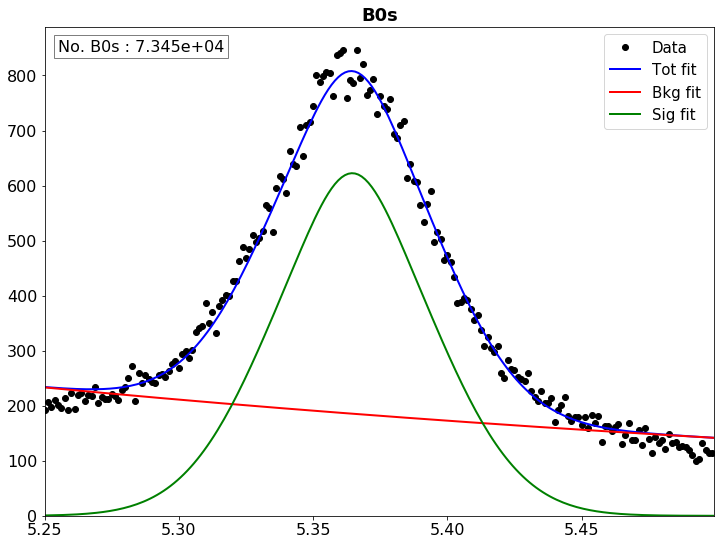

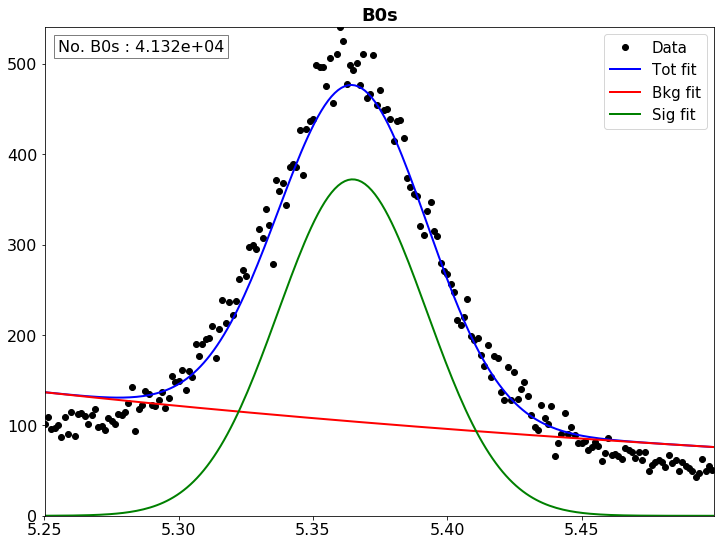

In [266]:

for vCut in range(9,0,-1):
    
    b_min = 5.25
    b_max = 5.50
    b_mass = 5.35

    dat = bbbar_data[bbbar_data["xChi"]<vCut]["xM"].values
    
    m = Observable("m",b_min,b_max)

    mean = Variable("mean",b_mass,b_min,b_max)
    sigma_1 = Variable("sigma_1",0.01,0.001,0.5)
    sig_1 = GaussianPdf("gauss_1",m,mean,sigma_1)

    sigma_2 = Variable("sigma_2",0.1,0.001,0.5)
    sig_2 = GaussianPdf("gauss_2",m,mean,sigma_2)
    gFrac = Variable("gFrac",0.05,0.0,1.0)

    sig = AddPdf("sig",gFrac,sig_1,sig_2)
    alpha = Variable("alpha",-0.5,-5.0,10.0)

    data = UnbinnedDataSet(m)

    bkg = ExpPdf("bkg",m,alpha)
    sFrac = Variable("sFrac",0.2,0.0,0.5)
    #nSig = Variable("nSig",1e3,10,1e5)
    #nBkg = Variable("nBkg",1e3,10,1e5)

    tot = AddPdf("add",[sFrac],[sig,bkg])
    data.from_matrix([dat], filter=True)

    tot.fitTo(data);

    s = (sFrac.value)
    b = (1.0-sFrac.value)

    dat = data.to_matrix()

    plt.figure(figsize=(12,9))
    print(dat, dat[0].shape)

    m.numbins = int(ngraph)
    # Make grid and evaluate on it
    grid = tot.makeGrid()
    tot.setData(grid)
    allcomps = tot.getCompProbsAtDataPoints()
    main, gauss, exp = tot.getCompProbsAtDataPoints()
    xvals = grid.to_matrix().flatten()
    nev = len(dat[0])
    mainSum = np.sum(main)
    main = np.multiply(main,nev)/np.sum(main)
    gauss = np.multiply(gauss,nev*s)/np.sum(gauss) 

    exp = np.multiply(exp,nev*b)/np.sum(exp)

    hh = np.histogram(dat[0],bins=int(ngraph))

    fig = plt.figure(figsize=(12,9))
    #plt.hist(dat[0],bins=int(ngraph))
    plt.plot(hh[1][:-1],hh[0],"o",c="black",label="Data")
    plt.plot([b_mass],[max(main)*1.1])
    plt.plot(xvals,main,linewidth=2,c="blue",label="Tot fit")
    plt.plot(xvals,exp,linewidth=2,c="red",label="Bkg fit")
    plt.plot(xvals,gauss,linewidth=2,c="green",label="Sig fit")

    ax = plt.gca()
    ax.margins(x=0,y=0,tight=False)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    plt.title("B0s",fontsize=18,fontweight="bold")
    plt.legend(fontsize=15)
    plt.text(0.02, .95, "No. B0s : %.3e" %nev,fontsize=16,bbox=dict(facecolor='white', alpha=0.5),transform=ax.transAxes)
    #plt.plot(xvals,main)
    #plt.plot(xvals,gauss)
    
    ratioB0s.append(float(s)/float(b))
    nevNB0s.append(nev)
    datsNB0s.append(hh)
    fitsNB0s.append([main,exp])

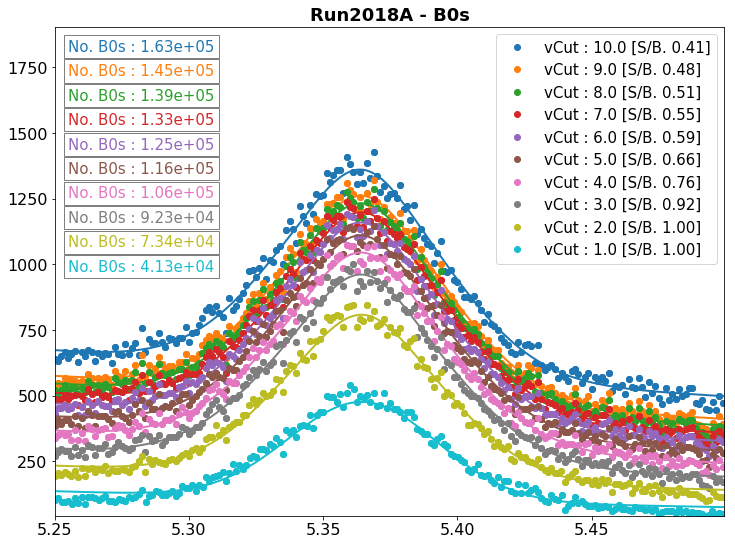

In [274]:
cuts = range(10,0,-1)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig = plt.figure(figsize=(12,9))
ystep = 0.0
    
for hh,main,nev,vcut,c,r in zip(datsNB0s,fitsNB0s,nevNB0s,cuts,colors[:len(cuts)],ratioB0s):
    #plt.hist(dat[0],bins=int(ngraph))
    plt.plot(hh[1][:-1],hh[0],"o",c=c,label="vCut : %.1f [S/B. %.2f]"%(vcut,float(r))) #c="black"
    plt.plot(hh[1][:-1],hh[0],"o",c=c)
    plt.plot([b_mass],[max(main[0])*1.4])
    plt.plot(xvals,main[0],linewidth=2,c=c)
    #plt.plot(xvals,exp,linewidth=2,c="red",label="Bkg fit")
    #plt.plot(xvals,gauss,linewidth=2,c="green",label="Sig fit")

    ax = plt.gca()
    ax.margins(x=0,y=0,tight=False)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    plt.title("Run2018A - B0s" ,fontsize=18,fontweight="bold")
    plt.legend(fontsize=15)
    ystep = ystep +0.05
    plt.text(0.02, 1.0-ystep, "No. B0s : %.2e" %nev,fontsize=15,bbox=dict(facecolor='white', alpha=0.5),transform=ax.transAxes,color=c)

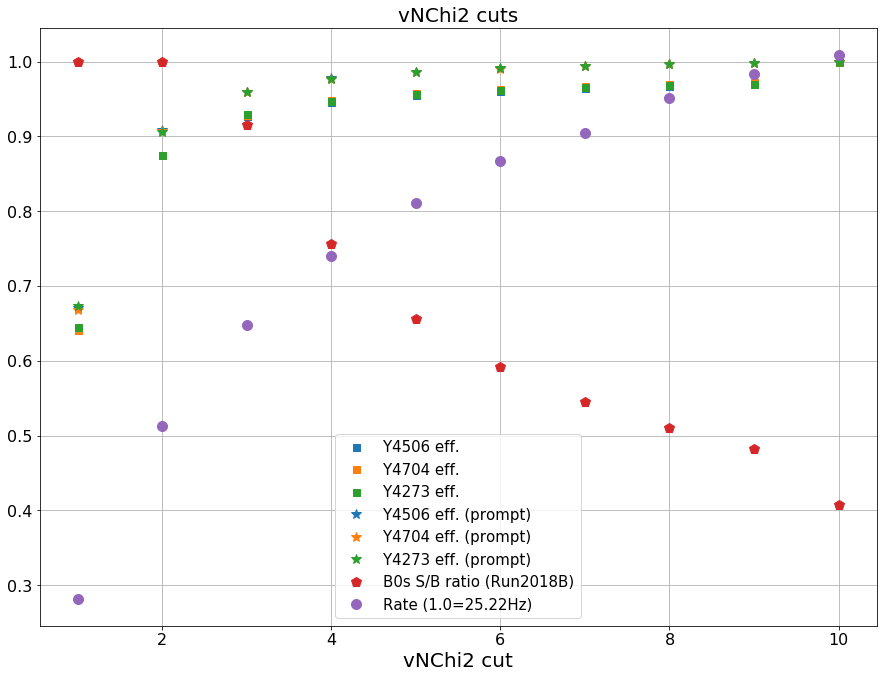

In [318]:
plt.figure(figsize=(15,11))

plt.gca().set_prop_cycle(None)
for k,d in myYsDf.iteritems():
    if "4140" in k:
        continue
    plt.plot(range(10,0,-1),yEff[k],'s',markersize=7,label = "Y"+str(k[1:5])+" eff.")
plt.gca().set_prop_cycle(None)
for k,d in myYsDf.iteritems():
    if "4140" in k:
        continue
    plt.plot(range(10,0,-1),yPromptEff[k],'*',markersize=10,label = "Y"+str(k[1:5])+" eff. (prompt)")

plt.plot(range(10,0,-1),ratioB0s,'p',markersize=10,label="B0s S/B ratio (Run2018B)")
plt.plot(range(10,0,-1),np.array(rates)/25.0,'o',markersize=10,label="Rate (1.0=25.22Hz)")

plt.title("vNChi2 cuts",fontsize=20)
plt.xlabel("vNChi2 cut",fontsize=20)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

plt.grid()
plt.legend(fontsize=15)

In [299]:
rates[3]=22.62